In [ ]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Read the files
df_medals_2020 = pd.read_excel('Medals_2020.xlsx')
df_medals_2024 = pd.read_csv('medals_2024.csv')
df_athlete_2024 = pd.read_csv('Athletes_2024.csv')
df_olympics = pd.read_csv('olympics_dataset.csv')

In [ ]:
df_olympics.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [ ]:
df_athlete_2024.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_medals_2020.head()


,Rank,NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,USA,39,41,33,113,1
1,2,CHN,38,32,18,88,2
2,3,JPN,27,14,17,58,5
3,4,GBR,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [ ]:
df_medals_2024.head()

,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
0,Gold Medal,1.0,7/27/2024,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2.0,7/27/2024,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3.0,7/27/2024,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1.0,7/27/2024,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2.0,7/27/2024,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525


In [ ]:
#select some columns from df_athlete_2024
selected_columns = ['name_tv', 'country_code', 'disciplines', 'gender']

# Create a new DataFrame with only the selected columns
athlete_2024 = df_athlete_2024[selected_columns]
print(athlete_2024.head())

             name_tv country_code    disciplines gender
0   Artur ALEKSANYAN          ARM  ['Wrestling']   Male
1     Malkhas AMOYAN          ARM  ['Wrestling']   Male
2    Slavik GALSTYAN          ARM  ['Wrestling']   Male
3  Arsen HARUTYUNYAN          ARM  ['Wrestling']   Male
4    Vazgen TEVANYAN          ARM  ['Wrestling']   Male


In [ ]:
#check for na's
athlete_2024.isna().sum()

,0
name_tv,0
country_code,0
disciplines,0
gender,0


In [ ]:
#remove brackets and rename
athlete_2024['disciplines'] = athlete_2024['disciplines'].astype(str).str.strip("[]").str.replace("'", "")
athlete_2024.rename(columns={'name_tv': 'athlete'}, inplace=True)
athlete_2024.rename(columns={'disciplines': 'sport'}, inplace=True)

print(athlete_2024.head())


             athlete country_code      sport gender
0   Artur ALEKSANYAN          ARM  Wrestling   Male
1     Malkhas AMOYAN          ARM  Wrestling   Male
2    Slavik GALSTYAN          ARM  Wrestling   Male
3  Arsen HARUTYUNYAN          ARM  Wrestling   Male
4    Vazgen TEVANYAN          ARM  Wrestling   Male


<ipython-input-15-3bcf95a26305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_2024['disciplines'] = athlete_2024['disciplines'].astype(str).str.strip("[]").str.replace("'", "")
<ipython-input-15-3bcf95a26305>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_2024.rename(columns={'name_tv': 'athlete'}, inplace=True)
<ipython-input-15-3bcf95a26305>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [ ]:
# Summer Tokyo 2020 data create a variable with only the summer of 2020 data

# Filter the summer data where Year is 2020 and City is Tokyo
df_tokyo_2020 = df_olympics[(df_olympics['Year'] == 2020)]

# Display the first few rows of the new DataFrame to verify the result
print(df_tokyo_2020.head())

# Display the tokyo 2020 attributes
df_tokyo_2020.info()

        player_id             Name Sex    Team  NOC  Year  Season   City  \
222552          0  Katrine Aalerud   F  Norway  NOR  2020  Summer  Tokyo   
222553          1  Katrine Aalerud   F  Norway  NOR  2020  Summer  Tokyo   
222554          2      Nestor Abad   M   Spain  ESP  2020  Summer  Tokyo   
222555          3      Nestor Abad   M   Spain  ESP  2020  Summer  Tokyo   
222556          4      Nestor Abad   M   Spain  ESP  2020  Summer  Tokyo   

                      Sport                          Event     Medal  
222552         Cycling Road              Women's Road Race  No medal  
222553         Cycling Road  Women's Individual Time Trial  No medal  
222554  Artistic Gymnastics               Men's All-Around  No medal  
222555  Artistic Gymnastics           Men's Floor Exercise  No medal  
222556  Artistic Gymnastics             Men's Pommel Horse  No medal  
<class 'pandas.core.frame.DataFrame'>
Index: 15121 entries, 222552 to 237672
Data columns (total 11 columns):
 #   Co

In [ ]:
# Top athletes with the most medals won for 2020
top_athletes = df_tokyo_2020
# Step 2: Replace NaNs in the Medal column with 'No Medal'
top_athletes['Medal'].fillna('No Medal', inplace=True)

# Step 3: Filter out rows with 'No Medal'
top_athletes = top_athletes[top_athletes['Medal'] != 'No Medal']

# Step 4: Count medals by type (Gold, Bronze, Silver) for each athlete
medal_count = top_athletes.pivot_table(index='Name',
                                         columns='Medal',
                                         aggfunc='size',
                                         fill_value=0)

# Step 5: Ensure all three columns (Gold, Silver, Bronze) are present
for medal_type in ['Gold', 'Bronze', 'Silver']:
    if medal_type not in medal_count.columns:
        medal_count[medal_type] = 0

# Step 6: Sort by Gold medals first, then Bronze, then Silver
top_athletes = medal_count.sort_values(by=['Gold', 'Bronze', 'Silver'], ascending=[False, False, False])

# Step 7: Display the top athletes
print(top_athletes)

Medal                  Bronze  Gold  No medal  Silver
Name                                                 
Caeleb Dressel              0     5         1       0
McKEON Emma                 3     4         0       0
McKEOWN Kaylee              1     3         0       0
Elaine Thompson-herah       0     3         0       0
Lisa Carrington             0     3         1       0
...                       ...   ...       ...     ...
van Vera                    0     0         6       0
van Wannes                  0     0         1       0
van Wayde                   0     0         3       0
van Willem                  0     0         2       0
von Chris                   0     0         2       0

[11608 rows x 4 columns]


<ipython-input-17-31777bda3a33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_athletes['Medal'].fillna('No Medal', inplace=True)


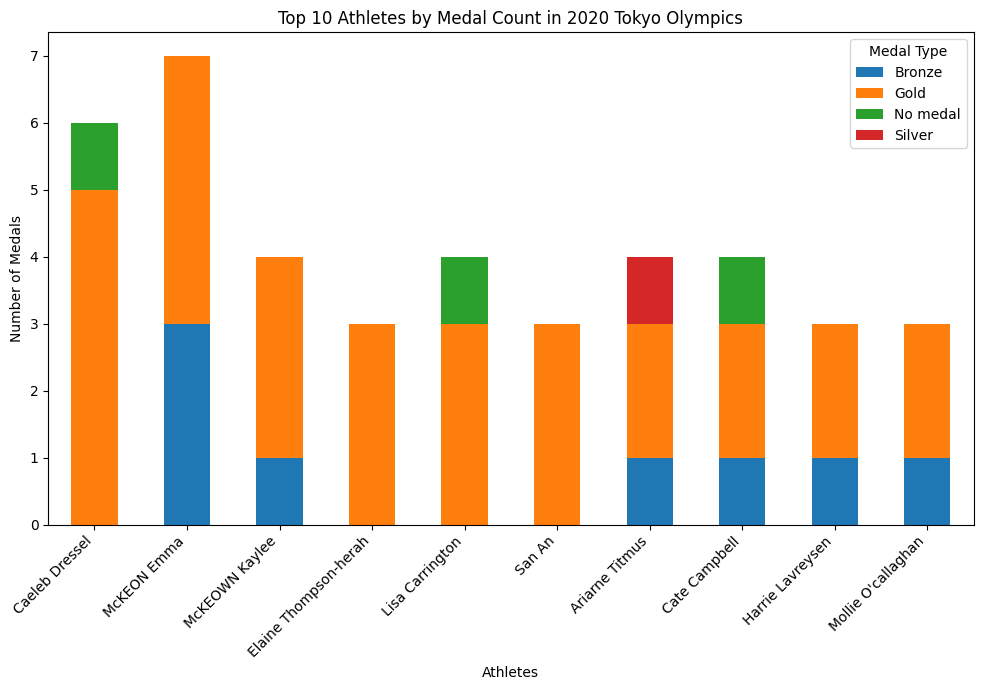

In [ ]:
#Visual of the top 10 athletes
# Select the top 10 athletes
top_10_athletes = top_athletes.head(10)

# Plotting
top_10_athletes.plot(kind='bar', stacked=True, figsize=(10, 7))

# Title and labels
plt.title('Top 10 Athletes by Medal Count in 2020 Tokyo Olympics')
plt.xlabel('Athletes')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')  # Rotate athlete names for better readability
plt.legend(title='Medal Type')
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# EDA - Medals 2020 dataset



# Check for missing values (NaNs) in the medals 2020 DataFrame
missing_values2 = df_medals_2020.isna().sum()
# Display the result
print(missing_values2)

# Display medals 2020 attributes
df_medals_2020.info()

Rank             0
NOC              0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   NOC            93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [ ]:
# Calculate the number of unique NOCs in the dataset
num_nocs_2020 = df_medals_2020['NOC'].nunique()
num_nocs_2024 = df_medals_2024['country_code'].nunique()
num_nocs_2020_Tokyo = df_tokyo_2020['NOC'].nunique()
# Print the result
print(f"Number of unique NOCs that participated in 2020: {num_nocs_2020}")
print(f"Number of unique NOCs that participated in 2020: {num_nocs_2020_Tokyo}")
print(f"Number of unique NOCs that participated in 2024: {num_nocs_2020}")

Number of unique NOCs that participated in 2020: 93
Number of unique NOCs that participated in 2020: 206
Number of unique NOCs that participated in 2024: 93


In [ ]:
# EDA - Medals 2024 dataset



# Display medals 2024 dataset attribute
df_medals_2024.info()

# Check for missing values (NaNs) in the DataFrame
missing_values3 = df_medals_2024.isna().sum()
# Display the result
print(missing_values3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   medal_type    1044 non-null   object 
 1   medal_code    1043 non-null   float64
 2   medal_date    1044 non-null   object 
 3   name          1044 non-null   object 
 4   country_code  1044 non-null   object 
 5   gender        1044 non-null   object 
 6   discipline    1044 non-null   object 
 7   event         1044 non-null   object 
 8   event_type    1044 non-null   object 
 9   url_event     1035 non-null   object 
 10  code          1044 non-null   object 
dtypes: float64(1), object(10)
memory usage: 89.8+ KB
medal_type      0
medal_code      1
medal_date      0
name            0
country_code    0
gender          0
discipline      0
event           0
event_type      0
url_event       9
code            0
dtype: int64


In [ ]:
#total number of medals won by each National Olympic Committee (NOC) at the 2020 Tokyo Olympics.
# Sum of medals by each country
medal_sums = df_medals_2020.groupby('NOC')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total medals for sorting
medal_sums['Total'] = medal_sums['Gold'] + medal_sums['Silver'] + medal_sums['Bronze']

# Sort the results by the total number of medals in descending order
medal_sums_sorted = medal_sums.sort_values(by='Total', ascending=False)

# Reset index to make NOC a column again
medal_sums_sorted.reset_index(inplace=True)

# Display the result
print(medal_sums_sorted)

    NOC  Gold  Silver  Bronze  Total
0   USA    39      41      33    113
1   CHN    38      32      18     88
2   ROC    20      28      23     71
3   GBR    22      21      22     65
4   JPN    27      14      17     58
..  ...   ...     ...     ...    ...
88  MKD     0       1       0      1
89  GHA     0       0       1      1
90  GRN     0       0       1      1
91  PUR     1       0       0      1
92  NAM     0       1       0      1

[93 rows x 5 columns]


In [ ]:
# Display the sorted DataFrame
display(medal_sums_sorted)

,NOC,Gold,Silver,Bronze,Total
0,USA,39,41,33,113
1,CHN,38,32,18,88
2,ROC,20,28,23,71
3,GBR,22,21,22,65
4,JPN,27,14,17,58
...,...,...,...,...,...
88,MKD,0,1,0,1
89,GHA,0,0,1,1
90,GRN,0,0,1,1
91,PUR,1,0,0,1


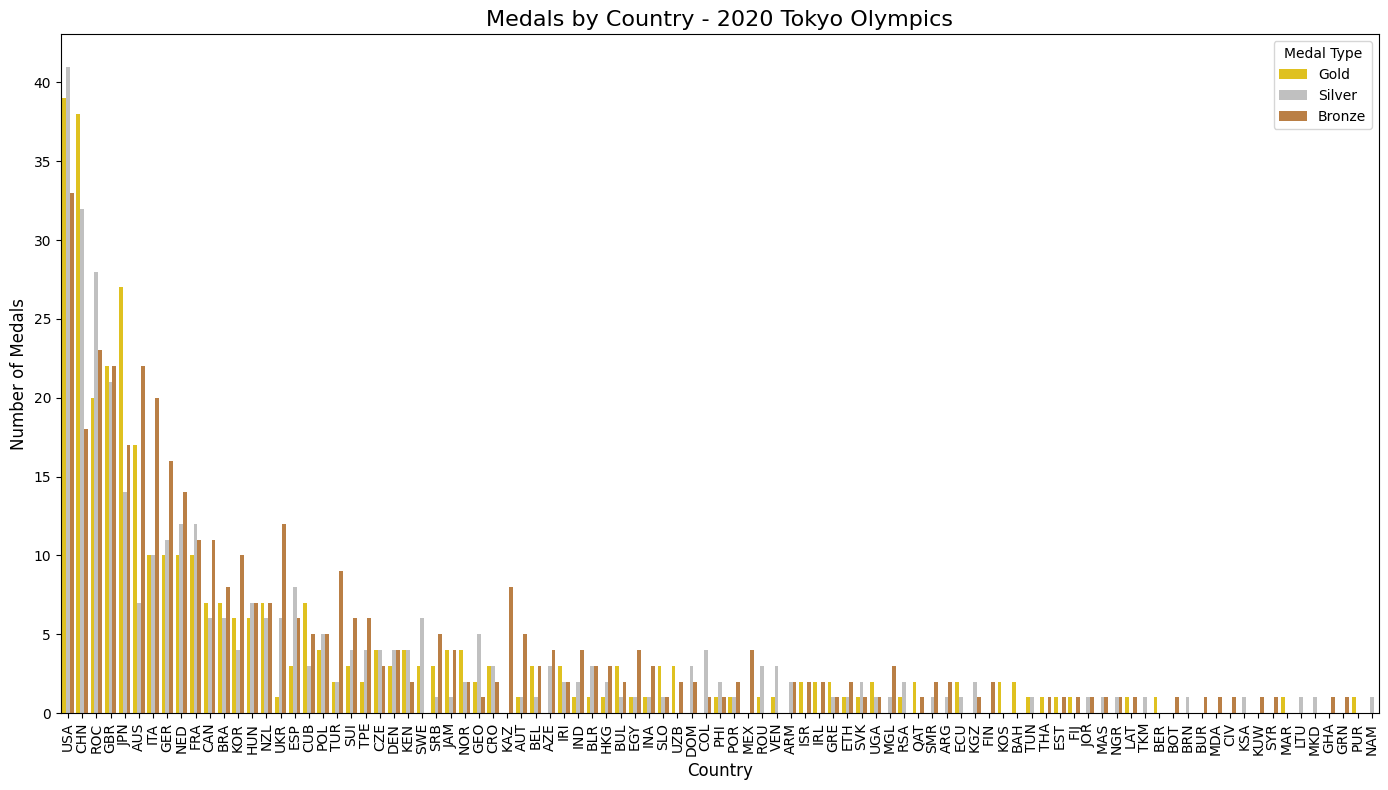

In [ ]:
# Visualization for sum of medals for Tokyo 2020 Olympics

# Convert the data to long format for Seaborn
df_long_2020 = pd.melt(medal_sums_sorted, id_vars=['NOC'], value_vars=['Gold', 'Silver', 'Bronze'],
                       var_name='Medal Type', value_name='Count')

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot using Seaborn with long format data
sns.barplot(x='NOC', y='Count', hue='Medal Type', data=df_long_2020,
            palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'})

# Adding titles and labels
plt.title('Medals by Country - 2020 Tokyo Olympics', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add legend with title
plt.legend(title='Medal Type')

# Apply tight layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


Lets choose one visual..I like the stocked bars

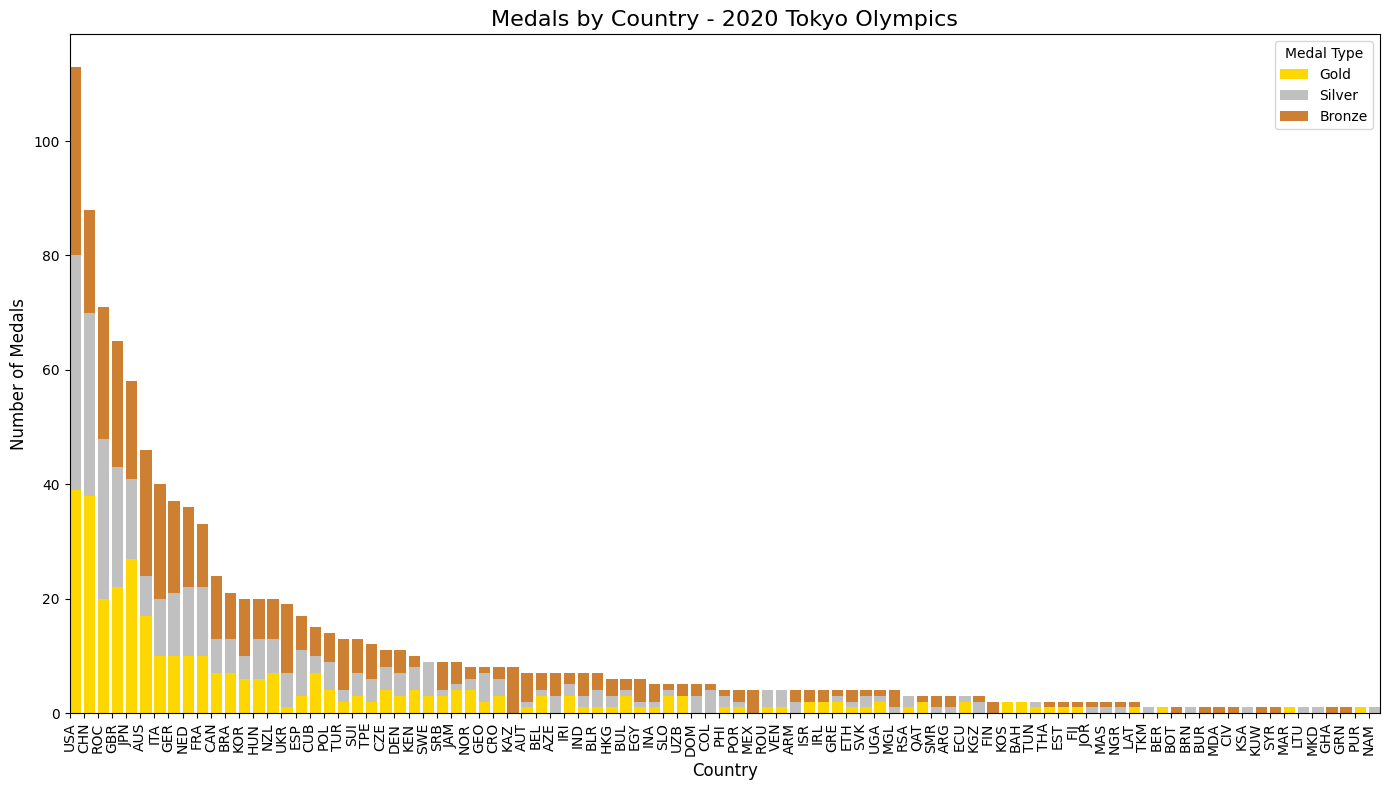

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the gold medals
plt.bar(medal_sums_sorted['NOC'], medal_sums_sorted['Gold'], color='gold', label='Gold', align='edge')

# Plot the silver medals on top of the gold medals
plt.bar(medal_sums_sorted['NOC'], medal_sums_sorted['Silver'], bottom=medal_sums_sorted['Gold'], color='silver', label='Silver', align='edge')

# Plot the bronze medals on top of the silver medals
plt.bar(medal_sums_sorted['NOC'], medal_sums_sorted['Bronze'],
        bottom=medal_sums_sorted['Gold'] + medal_sums_sorted['Silver'], color='#cd7f32', label='Bronze', align='edge')

# Adding titles and labels
plt.title('Medals by Country - 2020 Tokyo Olympics', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Remove x-axis margin
plt.margins(x=0)

# Add legend with title
plt.legend(title='Medal Type')
plt.grid(False)

# Apply tight layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Get the top 10 countries Tokyo Olympics
top_10_NOC = medal_sums_sorted.head(10)

# Display the result
print(top_10_NOC)
display(top_10_NOC)

   NOC  Gold  Silver  Bronze  Total
0  USA    39      41      33    113
1  CHN    38      32      18     88
2  ROC    20      28      23     71
3  GBR    22      21      22     65
4  JPN    27      14      17     58
5  AUS    17       7      22     46
6  ITA    10      10      20     40
7  GER    10      11      16     37
8  NED    10      12      14     36
9  FRA    10      12      11     33


,NOC,Gold,Silver,Bronze,Total
0,USA,39,41,33,113
1,CHN,38,32,18,88
2,ROC,20,28,23,71
3,GBR,22,21,22,65
4,JPN,27,14,17,58
5,AUS,17,7,22,46
6,ITA,10,10,20,40
7,GER,10,11,16,37
8,NED,10,12,14,36
9,FRA,10,12,11,33


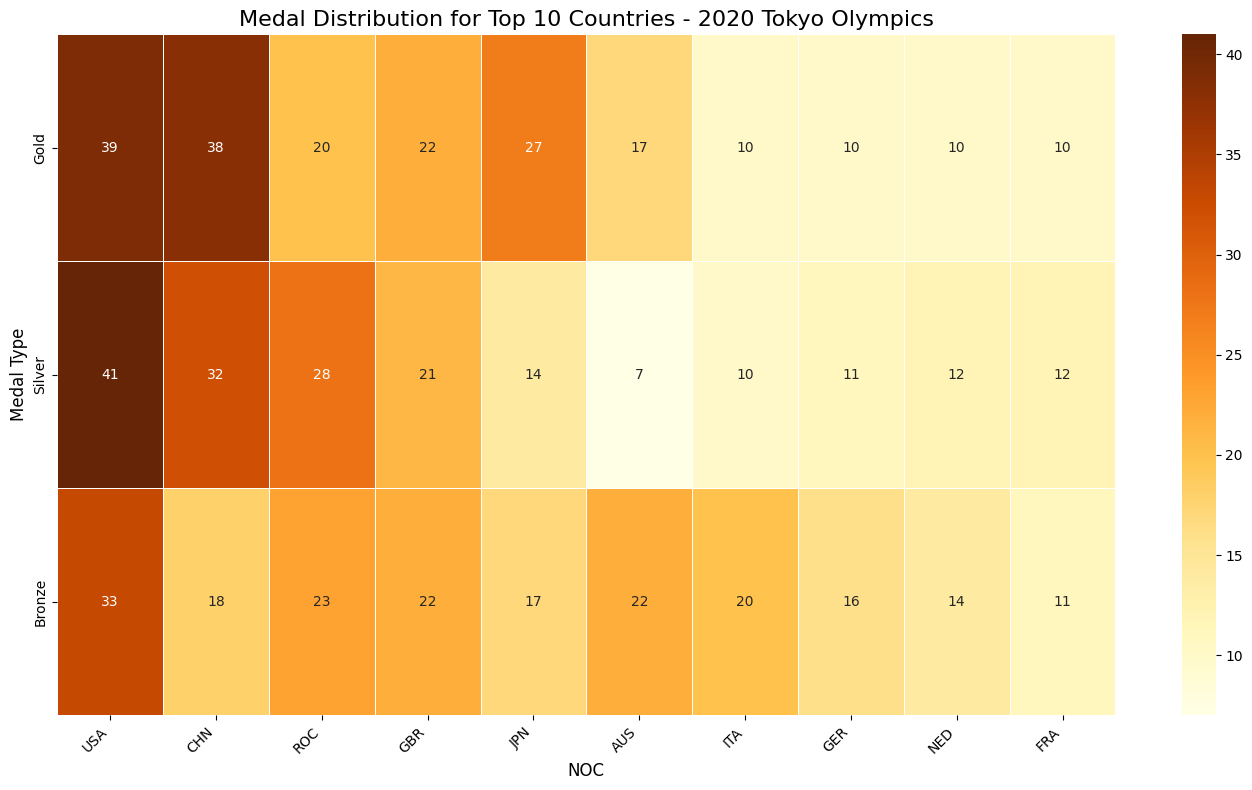

In [ ]:
# Visualization using heatmap for Tokyo 2020 Olympics showing medal distribution for the top 10 countries

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a heatmap
sns.heatmap(top_10_NOC[['Gold', 'Silver', 'Bronze']].T, annot=True, cmap='YlOrBr', linewidths=.5)

# Set title and labels
plt.title('Medal Distribution for Top 10 Countries - 2020 Tokyo Olympics', fontsize=16)
plt.xlabel('NOC', fontsize=12)
plt.ylabel('Medal Type', fontsize=12)

# Adjust x-axis labels for better readability
plt.xticks(ticks=[i+0.5 for i in range(10)], labels=top_10_NOC['NOC'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Sport that provides the most medals.
# Filter out rows where there is no medal
medal_winners = df_tokyo_2020[df_tokyo_2020['Medal'] != 'No medal']

# Group by 'Sport' and count the number of medals per sport
medals_per_sport = medal_winners.groupby('Sport').size().reset_index(name='Medal Count')

# Sort by medal count in descending order
medals_per_sport_sorted = medals_per_sport.sort_values(by='Medal Count', ascending=False)

# Display the sports with the most medals
medals_per_sport_sorted


,Sport,Medal Count
4,Athletics,230
36,Swimming,208
29,Rowing,144
20,Football,132
6,Baseball/Softball,117
23,Hockey,108
24,Judo,102
22,Handball,93
19,Fencing,90
16,Cycling Track,87


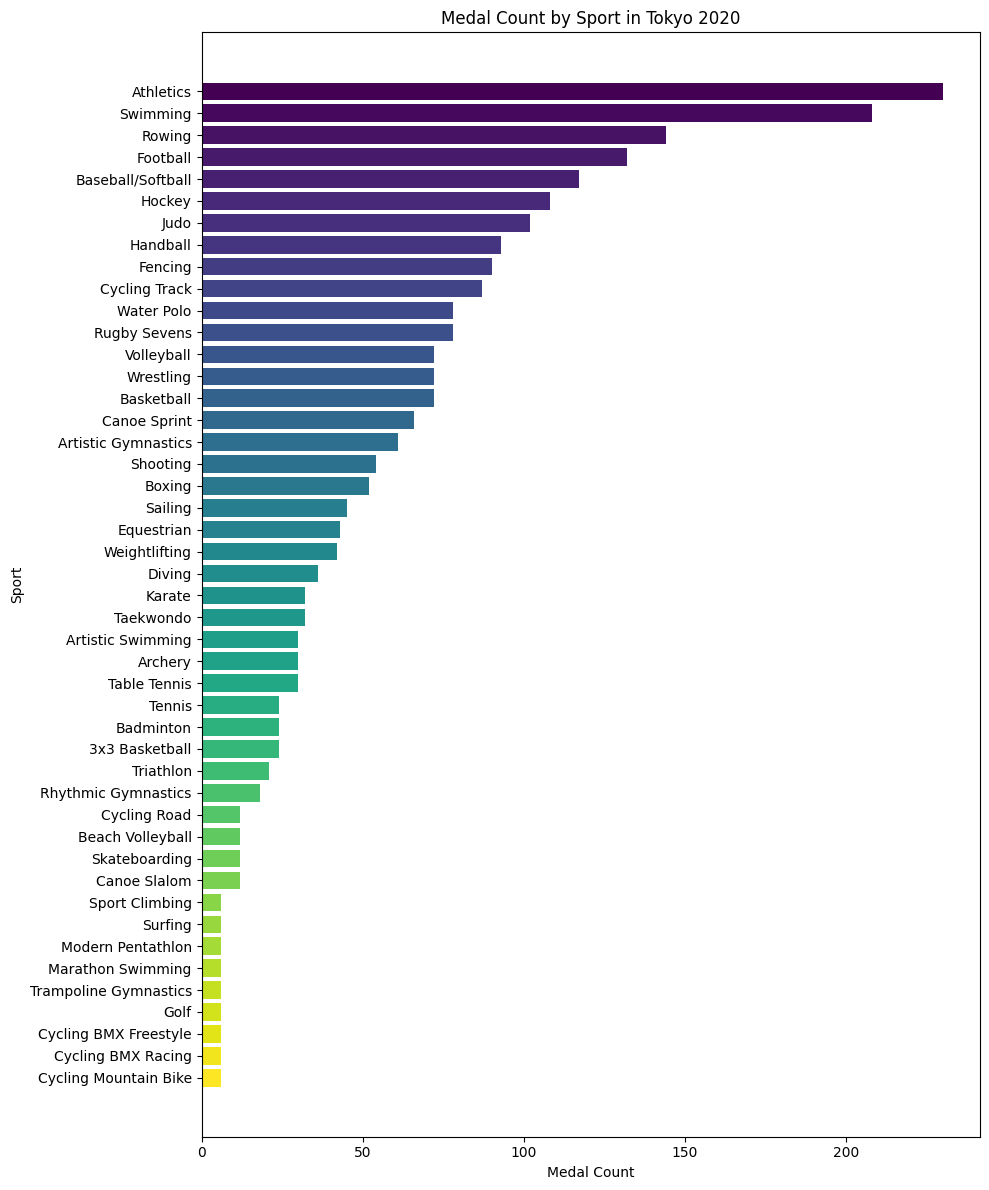

In [ ]:
# Generate a color map based on the number of sports
colors = plt.cm.viridis(np.linspace(0, 1, len(medals_per_sport_sorted)))

# Plotting all sports with their medal counts using a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(medals_per_sport_sorted['Sport'], medals_per_sport_sorted['Medal Count'], color=colors)
plt.xlabel('Medal Count')
plt.ylabel('Sport')
plt.title('Medal Count by Sport in Tokyo 2020')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest medal count on top
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Group by 'NOC' and 'Sport' and count the medals
noc_sport_medal_count = medal_winners.groupby(['Sport', 'NOC']).size().reset_index(name='Medal Count')

# Find the NOC that dominated each sport (i.e., has the highest medal count)
dominant_noc_per_sport = noc_sport_medal_count.loc[noc_sport_medal_count.groupby('Sport')['Medal Count'].idxmax()]

# Sort the result by 'Medal Count' in descending order
dominant_noc_per_sport_sorted = dominant_noc_per_sport.sort_values(by='Medal Count', ascending=False)

# Display the sorted result
dominant_noc_per_sport_sorted


,Sport,NOC,Medal Count
391,Swimming,USA,59
75,Athletics,USA,52
87,Baseball/Softball,JPN,39
228,Handball,FRA,32
446,Water Polo,HUN,26
318,Rugby Sevens,FIJ,26
90,Basketball,FRA,24
251,Judo,JPN,23
313,Rowing,NZL,23
215,Football,BRA,22


In [ ]:
# Calculate the number of unique NOCs that appear as dominant in different sports
unique_nocs = dominant_noc_per_sport_sorted['NOC'].nunique()
print(f"Number of unique NOCs: {unique_nocs}")


Number of unique NOCs: 18


<ipython-input-32-199278bc9203>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(unique_nocs))  # Use 'tab20' colormap for distinct colors


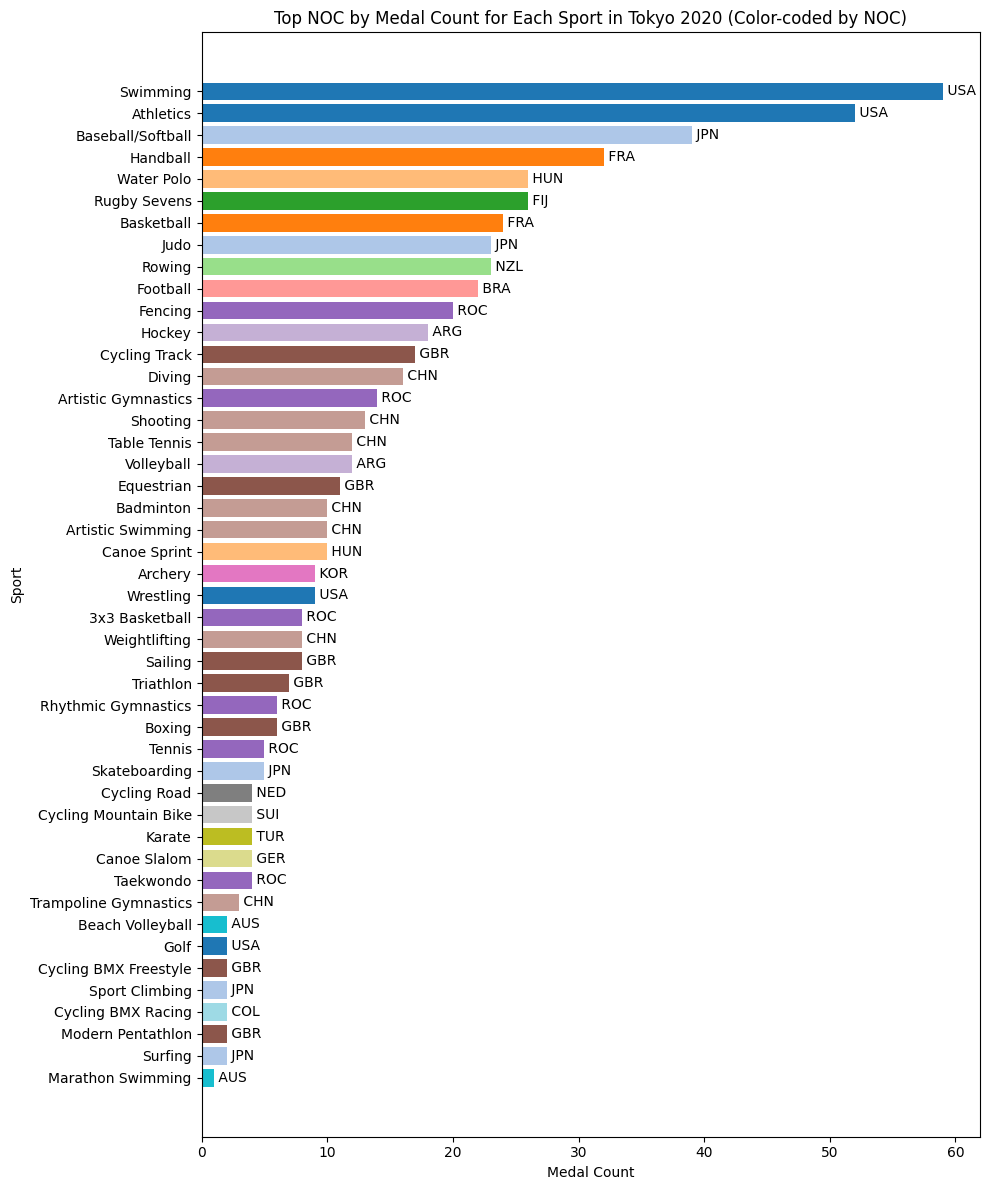

In [ ]:


# Generate unique colors for each NOC
unique_nocs = dominant_noc_per_sport_sorted['NOC'].unique()
color_map = plt.cm.get_cmap('tab20', len(unique_nocs))  # Use 'tab20' colormap for distinct colors

# Create a color dictionary to map each NOC to a unique color
color_dict = {noc: color_map(i) for i, noc in enumerate(unique_nocs)}

# Assign colors to each bar based on the NOC
bar_colors = [color_dict[noc] for noc in dominant_noc_per_sport_sorted['NOC']]

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 12))
bars = plt.barh(dominant_noc_per_sport_sorted['Sport'], dominant_noc_per_sport_sorted['Medal Count'], color=bar_colors)

# Add NOC labels to each bar
for bar, noc in zip(bars, dominant_noc_per_sport_sorted['NOC']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, ' ' + noc, va='center')

# Add labels and title
plt.xlabel('Medal Count')
plt.ylabel('Sport')
plt.title('Top NOC by Medal Count for Each Sport in Tokyo 2020 (Color-coded by NOC)')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest medal count on top
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Gender distributions for Tokyo 2020

# Extract gender from the 'Sex' column
gender_dataset = df_tokyo_2020.copy()
gender_dataset['Sex'] = gender_dataset['Sex'].apply(lambda x: 'Men' if x == 'M' else 'Women')

# Count the number of unique athletes by sport and gender
athlete_counts_2020 = gender_dataset.groupby(['Sport', 'Sex'])['Name'].nunique().unstack(fill_value=0)

# Replace NaN with 0 (if needed)
athlete_counts_filled_2020 = athlete_counts_2020.fillna(0)

# Add a Total column
athlete_counts_filled_2020['Total'] = athlete_counts_filled_2020['Men'] + athlete_counts_filled_2020['Women']

# Sort the DataFrame by the 'Total' column in descending order
athlete_counts_sorted_2020 = athlete_counts_filled_2020.sort_values(by='Total', ascending=False)

# Display the sorted athlete counts
display(athlete_counts_sorted_2020)


Sex,Men,Women,Total
Sport,,,
Athletics,1080,961,2041
Swimming,479,401,880
Football,344,264,608
Rowing,265,257,522
Hockey,216,216,432
Judo,201,192,393
Handball,184,183,367
Shooting,178,178,356
Sailing,175,175,350


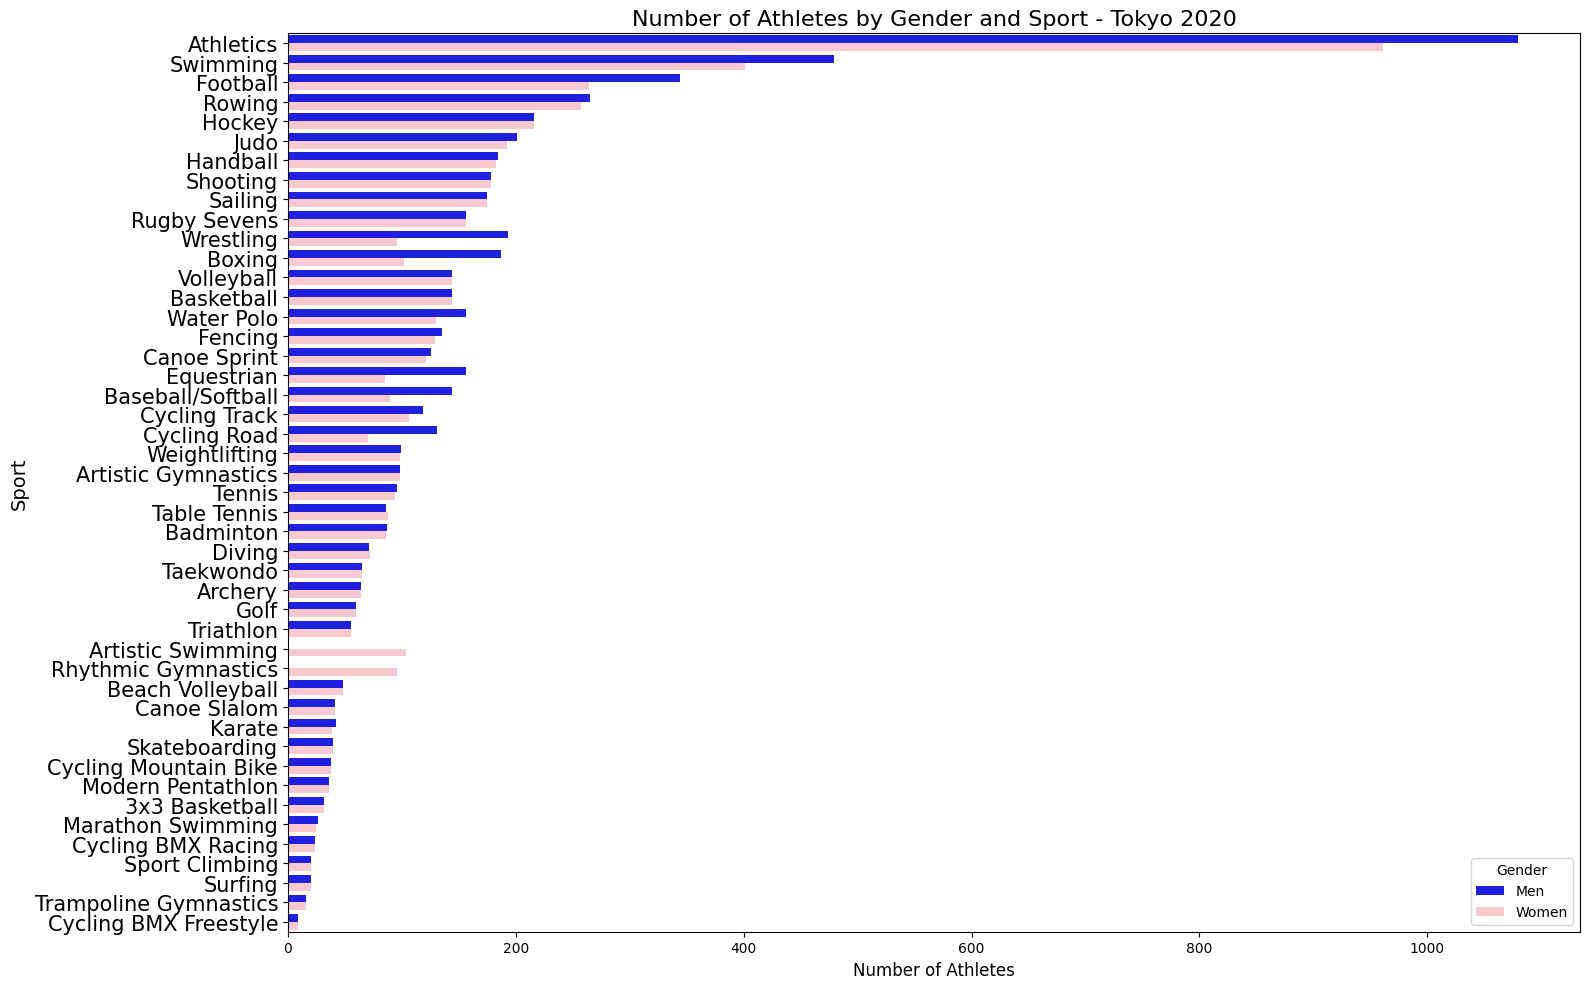

In [ ]:
# Reshape the DataFrame for easier plotting with hue
athlete_counts_melted_2020 = athlete_counts_sorted_2020[['Men', 'Women']].reset_index().melt(id_vars='Sport', value_vars=['Men', 'Women'], var_name='Gender', value_name='Count')

# Create a horizontal bar plot for Tokyo 2020
plt.figure(figsize=(16, 10))

# Customize colors for 'Men' and 'Women'
sns.barplot(y='Sport', x='Count', hue='Gender', data=athlete_counts_melted_2020,
            palette={'Men': 'blue', 'Women': 'pink'})

# Increase the font size for the sport names (y-axis labels)
plt.yticks(fontsize=15)  # Adjust the font size of the y-axis (sports names)

# Adding titles and labels
plt.title('Number of Athletes by Gender and Sport - Tokyo 2020', fontsize=16)  # Title
plt.xlabel('Number of Athletes', fontsize=12)  # Label for the x-axis
plt.ylabel('Sport', fontsize=14)  # Label for the y-axis

# Apply tight layout to prevent overlapping
plt.tight_layout()

# Save the plot with higher DPI for better resolution
plt.savefig('athletes_by_gender_tokyo_2020_horizontal.png', dpi=400)  # Higher DPI for clearer image

# Show the plot
plt.show()


In [ ]:
#Number of Athletes per a country for 2020
# Count the number of athletes per country
athletes_per_country = df_tokyo_2020.copy()
athletes_per_country = athletes_per_country.groupby('NOC')['Name'].nunique()

#  Calculate the toatl, mean, min, and max
Total_athletics_2020= athletes_per_country.sum()
mean_athletes_2020 = athletes_per_country.mean()
min_athletes_2020 = athletes_per_country.min()
max_athletes_2020 = athletes_per_country.max()

# Print the results
print(f"Total number of athletes: {Total_athletics_2020}")

print(f"Mean number of athletes per country: {mean_athletes_2020}")
print(f"Minimum number of athletes for a country: {min_athletes_2020}")
print(f"Maximum number of athletes for a country: {max_athletes_2020}")


Total number of athletes: 11629
Mean number of athletes per country: 56.45145631067961
Minimum number of athletes for a country: 2
Maximum number of athletes for a country: 633


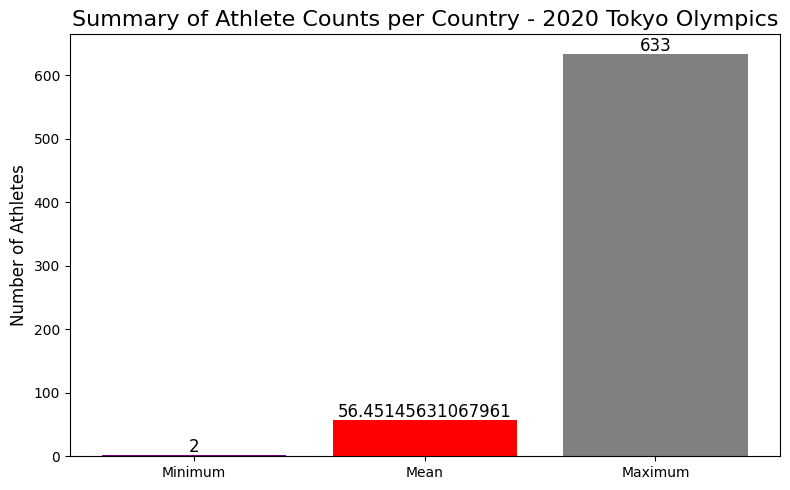

In [ ]:
# Data for the visualization
stats_2020 = ['Minimum', 'Mean', 'Maximum']
values_2020 = [min_athletes_2020, mean_athletes_2020, max_athletes_2020]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(stats_2020, values_2020, color=['purple', 'red', 'grey'])

# Add titles and labels
plt.title('Summary of Athlete Counts per Country - 2020 Tokyo Olympics', fontsize=16)
plt.ylabel('Number of Athletes', fontsize=12)

# Add the actual values on top of each bar
for i, value in enumerate(values_2020):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Sort the Series by total number of athletes for better visualization
athletes_by_country_sorted = athletes_per_country.sort_values(ascending=False)
print(athletes_by_country_sorted)
display(athletes_by_country_sorted)


NOC
USA    633
JPN    613
AUS    489
CHN    417
GER    415
      ... 
BER      2
LES      2
SOM      2
AND      2
CAF      2
Name: Name, Length: 206, dtype: int64


,Name
NOC,
USA,633
JPN,613
AUS,489
CHN,417
GER,415
...,...
BER,2
LES,2
SOM,2


In [ ]:
# Get the top 10 countries Tokyo Olympics
Highest_athletes_count = athletes_by_country_sorted.head(10)

# Display the result
print(Highest_athletes_count)
display(Highest_athletes_count)

NOC
USA    633
JPN    613
AUS    489
CHN    417
GER    415
FRA    396
GBR    392
CAN    386
ITA    377
ROC    341
Name: Name, dtype: int64


,Name
NOC,
USA,633
JPN,613
AUS,489
CHN,417
GER,415
FRA,396
GBR,392
CAN,386
ITA,377


In [ ]:
# Get the top 10 countries by athlete count for the Tokyo Olympics
Highest_athletes_count = athletes_by_country_sorted.head(10)

# Rename the column to 'Athlete Count'
Highest_athletes_count = Highest_athletes_count.reset_index().rename(columns={Highest_athletes_count.name: 'Athlete Count'})

# Display the result
print(Highest_athletes_count)
display(Highest_athletes_count)


   NOC  Athlete Count
0  USA            633
1  JPN            613
2  AUS            489
3  CHN            417
4  GER            415
5  FRA            396
6  GBR            392
7  CAN            386
8  ITA            377
9  ROC            341


,NOC,Athlete Count
0,USA,633
1,JPN,613
2,AUS,489
3,CHN,417
4,GER,415
5,FRA,396
6,GBR,392
7,CAN,386
8,ITA,377
9,ROC,341


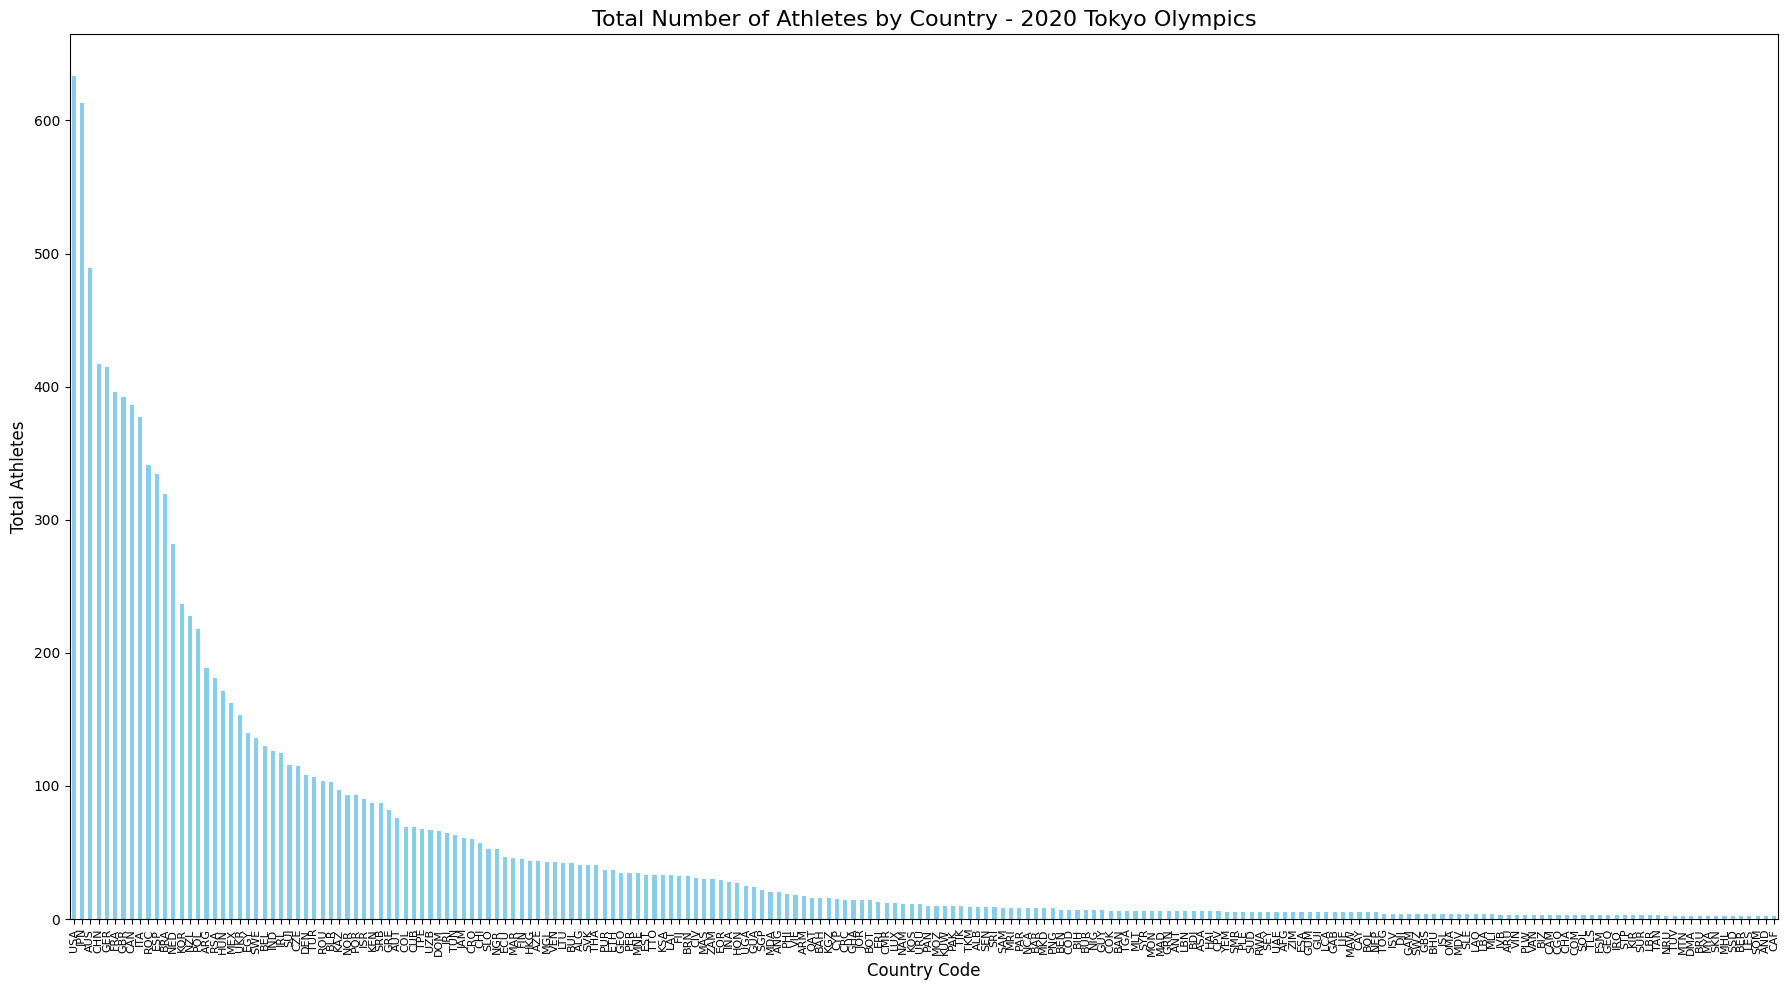

In [ ]:
# Sort the Series by total number of athletes for better visualization
athletes_by_country_sorted = athletes_per_country.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 10))
athletes_by_country_sorted.plot(kind='bar', color='skyblue')

# Rotate x-axis labels for readability and adjust font size
plt.xticks(rotation=90, fontsize=8, ha='center')

# Add titles and labels
plt.title('Total Number of Athletes by Country - 2020 Tokyo Olympics', fontsize=16)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Total Athletes', fontsize=12)

# Apply tight layout to avoid clipping
plt.tight_layout()
# Remove grid lines
plt.grid(False)
# Show the plot
plt.show()


In [ ]:
# Codes Below Are Summer Olympic 2024 Analysis

# Medals won on this years 2024 current Olympics by country?
# Group by country_code and medal_type to get counts
medals_by_country = df_medals_2024.groupby(['country_code', 'medal_type']).size().unstack(fill_value=0)

# Calculate the total medals
medals_by_country['Total'] = medals_by_country.sum(axis=1)
# Sort by total medals in descending order
medals_by_country_sorted_d = medals_by_country.sort_values('Total', ascending=False)

# Display the result
print(medals_by_country_sorted_d)

Top_10_NOC_2024=medals_by_country_sorted_d.head(10)
display(Top_10_NOC_2024)

medal_type    Bronze Medal  Gold Medal  Silver Medal  Total
country_code                                               
USA                     42          40            44    126
CHN                     24          40            27     91
GBR                     29          14            22     65
FRA                     22          16            26     64
AUS                     16          18            19     53
...                    ...         ...           ...    ...
MGL                      0           0             1      1
EOR                      1           0             0      1
FIJ                      0           0             1      1
JOR                      0           0             1      1
ZAM                      1           0             0      1

[92 rows x 4 columns]


medal_type,Bronze Medal,Gold Medal,Silver Medal,Total
country_code,,,,
USA,42,40,44,126
CHN,24,40,27,91
GBR,29,14,22,65
FRA,22,16,26,64
AUS,16,18,19,53
JPN,13,20,12,45
ITA,15,12,13,40
NED,12,15,7,34
GER,8,12,13,33


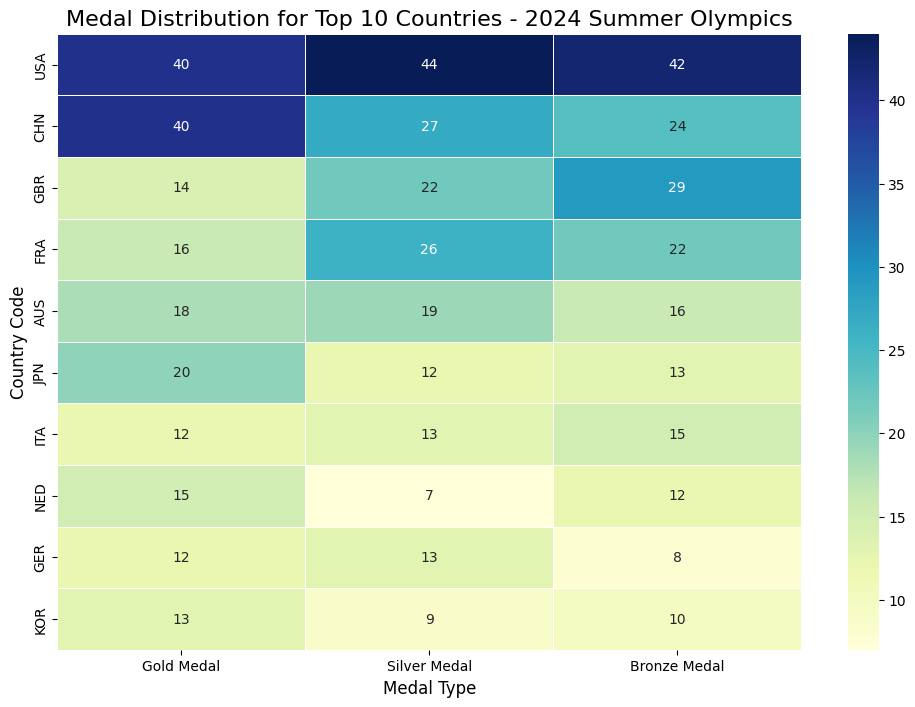

In [ ]:
# Create the heatmap for Gold, Silver, and Bronze medals
plt.figure(figsize=(12, 8))
sns.heatmap(Top_10_NOC_2024[['Gold Medal', 'Silver Medal', 'Bronze Medal']], annot=True, cmap='YlGnBu', fmt="d", linewidths=.5)

# Adding titles and labels
plt.title('Medal Distribution for Top 10 Countries - 2024 Summer Olympics', fontsize=16)
plt.xlabel('Medal Type', fontsize=12)
plt.ylabel('Country Code', fontsize=12)

# Show the plot
plt.show()




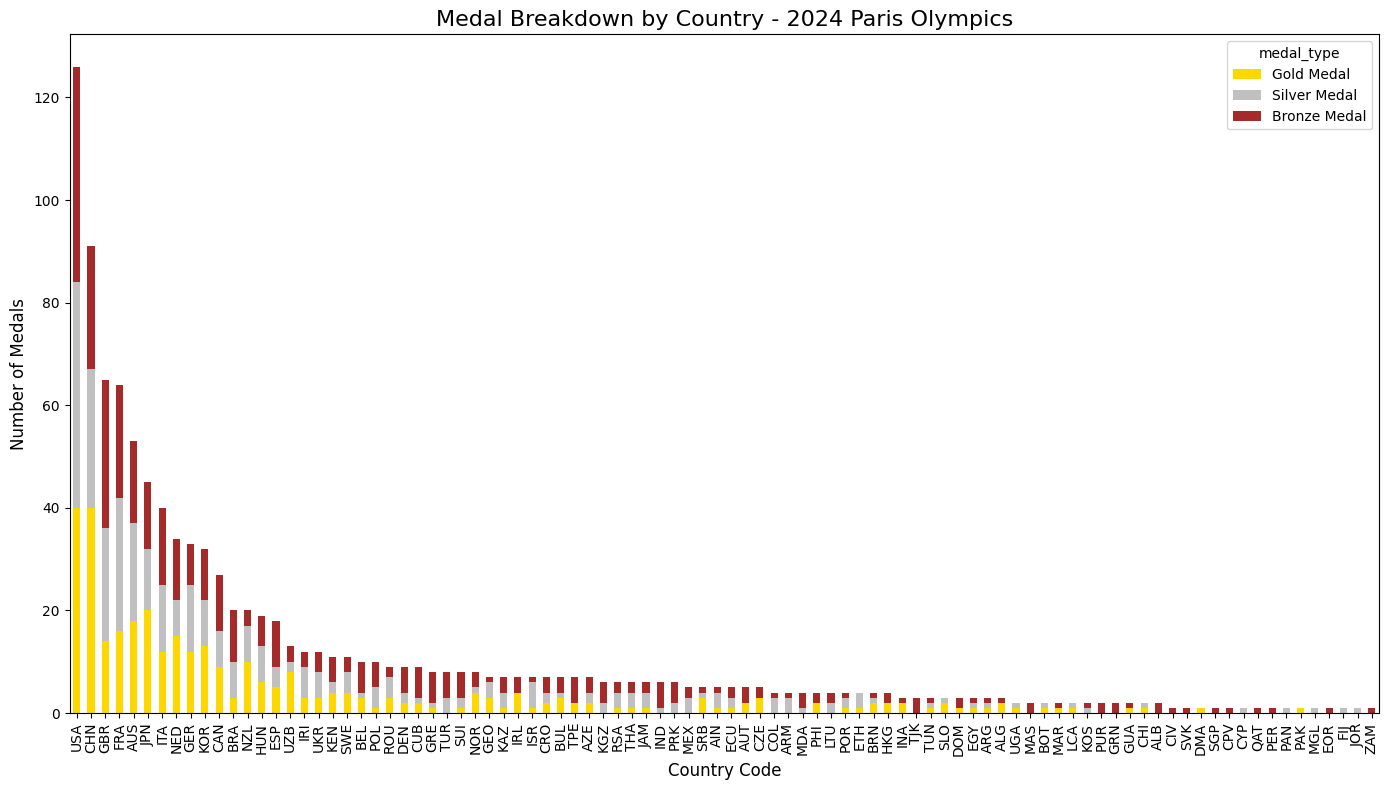

In [ ]:
# Create a stacked bar plot to visualize the breakdown of medals by type
plt.figure(figsize=(14, 8))  # Adjusting figure size for better readability

# Plot the data for each medal type as a stacked bar
medals_by_country_sorted_d[['Gold Medal', 'Silver Medal', 'Bronze Medal']].plot(
    kind='bar', stacked=True, color=['gold', 'silver', 'brown'], ax=plt.gca())

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Medal Breakdown by Country - 2024 Paris Olympics', fontsize=16)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# Remove grid lines
plt.grid(False)

# Apply tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Group by 'disciplines' and 'gender' and count the occurrences
gender_division_by_discipline_2024 = athlete_2024.groupby(['sport', 'gender']).size().reset_index(name='count')

# Print the result
print(gender_division_by_discipline_2024)


                  sport  gender  count
0        3x3 Basketball  Female     33
1        3x3 Basketball    Male     32
2               Archery  Female     64
3               Archery    Male     64
4   Artistic Gymnastics  Female     94
..                  ...     ...    ...
90           Water Polo    Male    156
91        Weightlifting  Female     61
92        Weightlifting    Male     61
93            Wrestling  Female     96
94            Wrestling    Male    195

[95 rows x 3 columns]


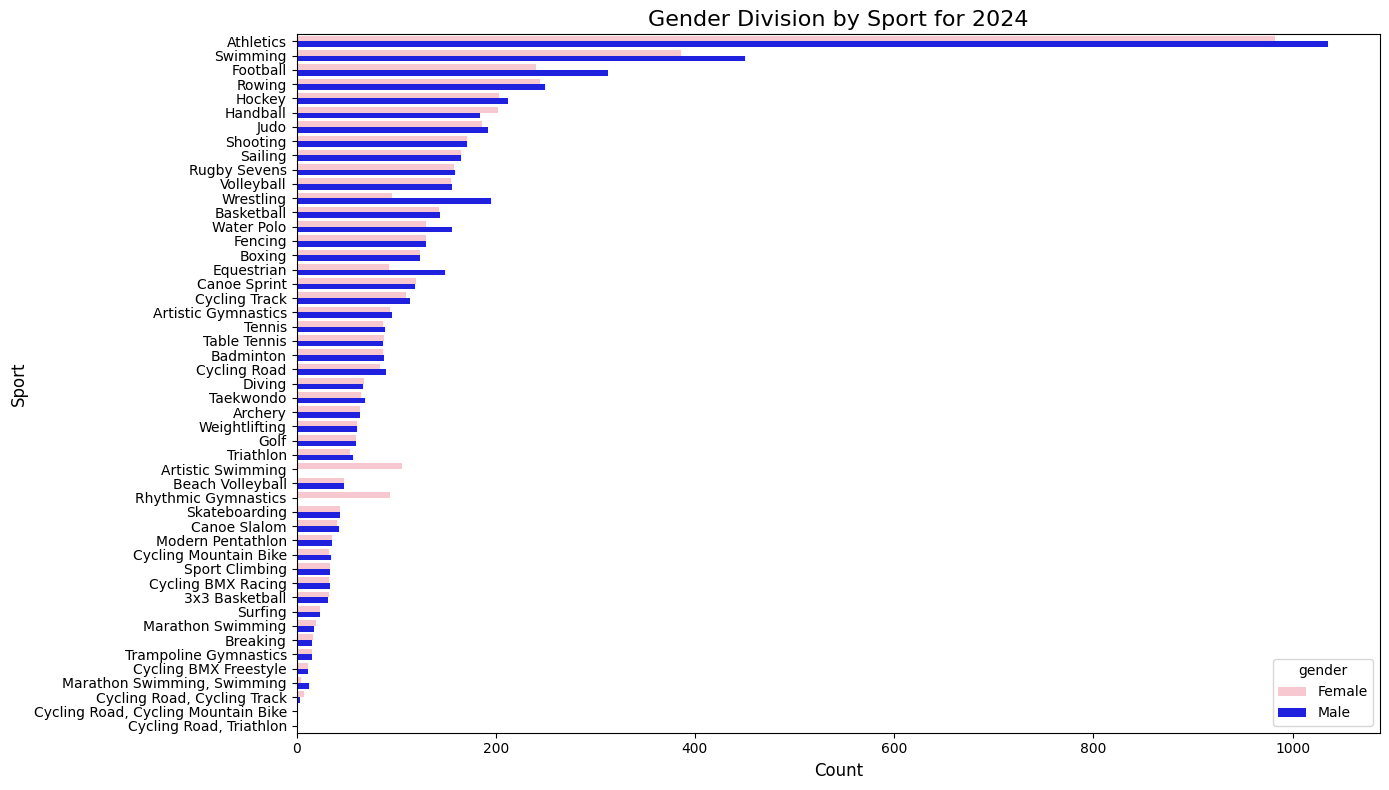

In [ ]:
# Compute the total count for each discipline
total_counts_2024 = gender_division_by_discipline_2024.groupby('sport')['count'].sum().reset_index()

# Sort the disciplines based on the total count
sorted_discipline_2024 = total_counts_2024.sort_values(by='count', ascending=False)['sport']

# Reorder the original DataFrame based on the sorted disciplines
gender_division_by_discipline_2024['sport'] = pd.Categorical(
    gender_division_by_discipline_2024['sport'],
    categories=sorted_discipline_2024,
    ordered=True
)

# Create a horizontal bar plot to visualize the gender division by discipline
plt.figure(figsize=(14, 8))

# Use seaborn to create a bar plot with custom blue and pink colors for genders, switching x and y
sns.barplot(data=gender_division_by_discipline_2024, y='sport', x='count', hue='gender',
            palette={'Male': 'blue', 'Female': 'pink'})  # Ensure keys match exact gender labels in your data

# Add titles and labels
plt.title('Gender Division by Sport for 2024', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Sport', fontsize=12)

# Save the plot with higher resolution (DPI 300 for better quality)
plt.tight_layout()
plt.savefig('gender_division_2024.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
# Athletes per Country:
# Group by 'country_code' and count the number of athletes
athletes_per_country_2024 = athlete_2024.groupby('country_code').size().reset_index(name='athlete_count')

# Sort the result by 'athlete_count' in descending order to see which country had the most athletes
athletes_per_country_2024 = athletes_per_country_2024.sort_values(by='athlete_count', ascending=False)

# Print the result
print(athletes_per_country_2024)
display(athletes_per_country_2024)

    country_code  athlete_count
197          USA            619
65           FRA            600
11           AUS            475
73           GER            457
97           JPN            431
..           ...            ...
132          MTN              2
141          NRU              1
169          SOM              1
113          LIE              1
23           BIZ              1

[206 rows x 2 columns]


,country_code,athlete_count
197,USA,619
65,FRA,600
11,AUS,475
73,GER,457
97,JPN,431
...,...,...
132,MTN,2
141,NRU,1
169,SOM,1
113,LIE,1


In [ ]:
# Calculate the minimum, maximum, and median number of athletes per country
min_athletes_2024 = athletes_per_country_2024['athlete_count'].min()
max_athletes_2024 = athletes_per_country_2024['athlete_count'].max()
mean_athletes_2024 = athletes_per_country_2024['athlete_count'].mean()

# Print the results
print(f"Minimum number of athletes per country: {min_athletes_2024}")
print(f"Maximum number of athletes per country: {max_athletes_2024}")
print(f"Median number of athletes per country: {mean_athletes_2024}")

# Display the sorted DataFrame
display(athletes_per_country_2024)

Minimum number of athletes per country: 1
Maximum number of athletes per country: 619
Median number of athletes per country: 53.932038834951456


,country_code,athlete_count
197,USA,619
65,FRA,600
11,AUS,475
73,GER,457
97,JPN,431
...,...,...
132,MTN,2
141,NRU,1
169,SOM,1
113,LIE,1


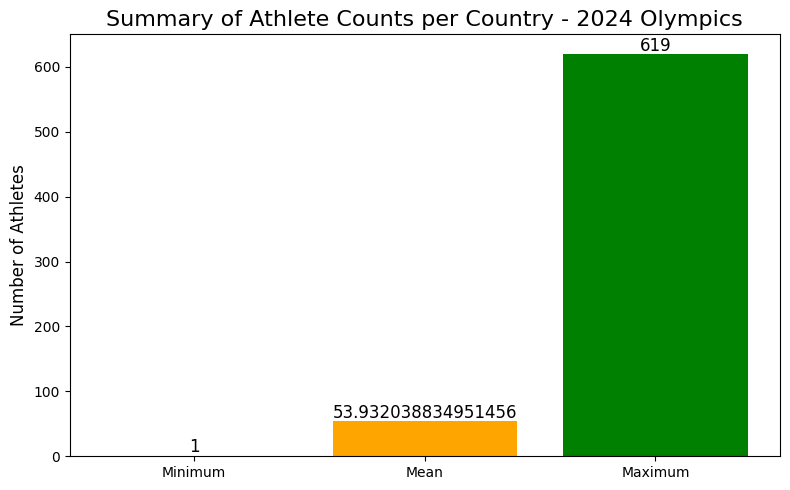

In [ ]:
# Data for the visualization
stats = ['Minimum', 'Mean', 'Maximum']
values = [min_athletes_2024, mean_athletes_2024, max_athletes_2024]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(stats, values, color=['blue', 'orange', 'green'])

# Add titles and labels
plt.title('Summary of Athlete Counts per Country - 2024 Olympics', fontsize=16)
plt.ylabel('Number of Athletes', fontsize=12)

# Add the actual values on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
athletes_per_country_top_10_noc=athletes_per_country_2024.head(10)
display(athletes_per_country_top_10_noc)

,country_code,athlete_count
197,USA,619
65,FRA,600
11,AUS,475
73,GER,457
97,JPN,431
60,ESP,401
38,CHN,398
93,ITA,397
69,GBR,342
33,CAN,332


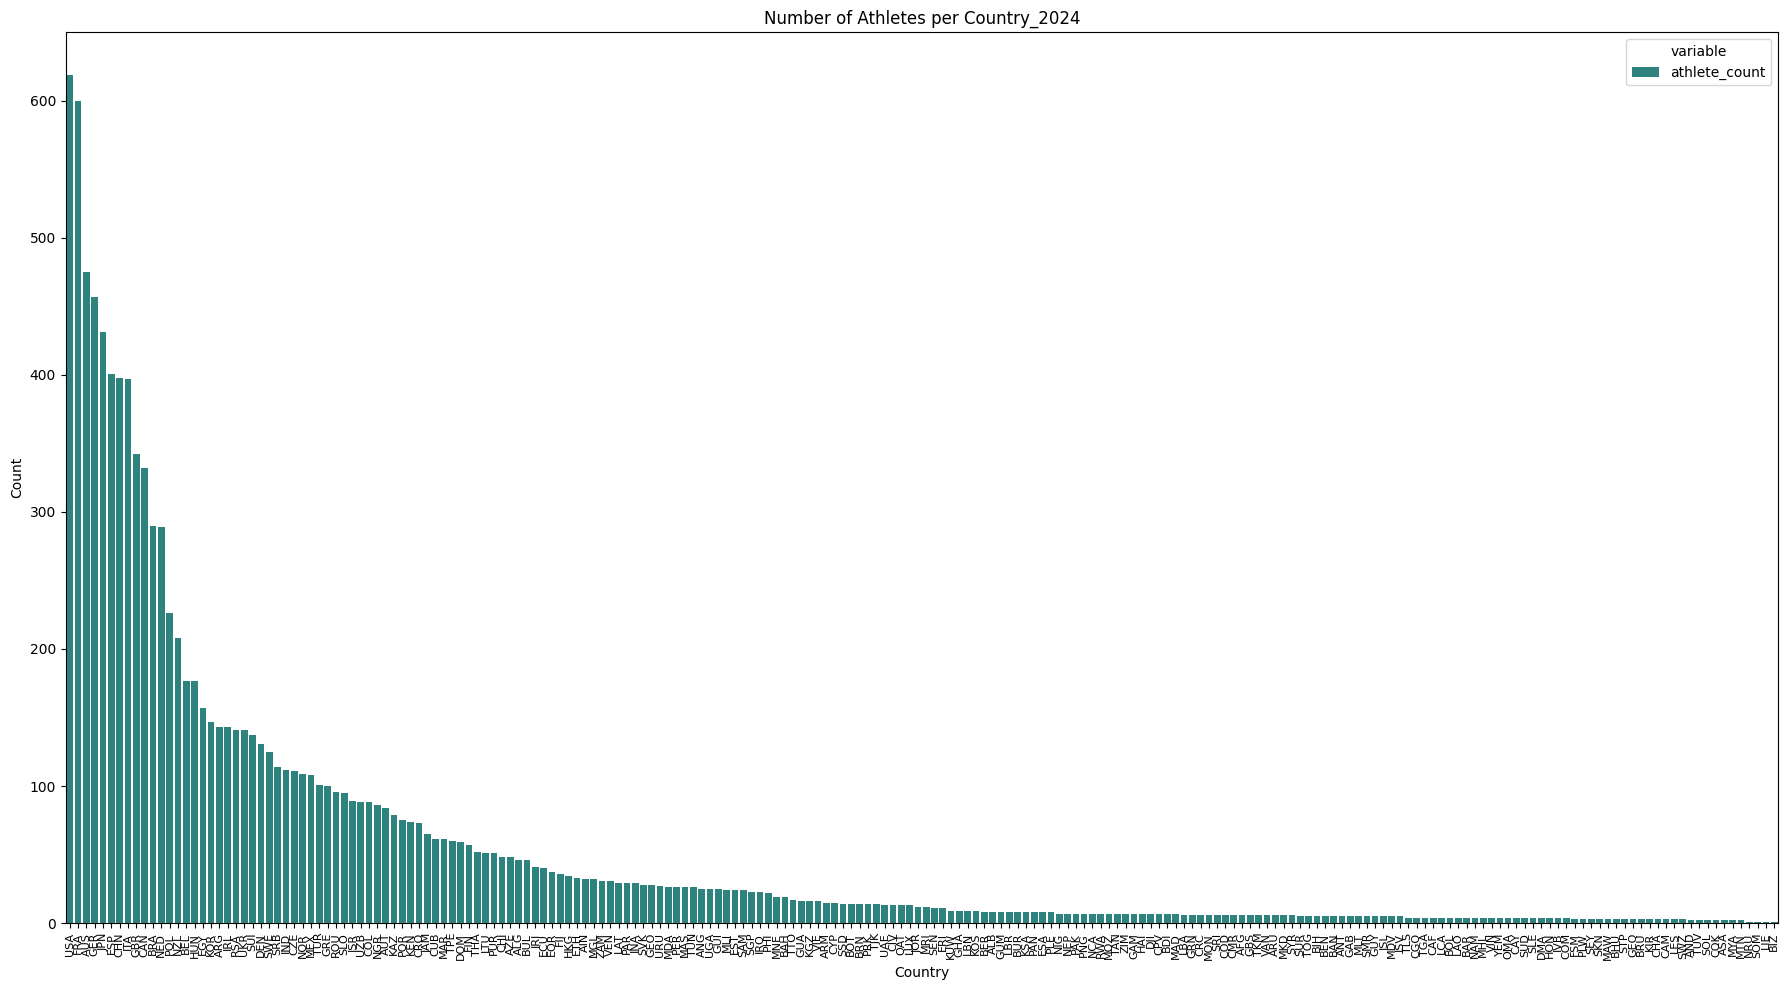

In [ ]:
# Convert data to long format
long_format = pd.melt(athletes_per_country_2024, id_vars=['country_code'], value_vars=['athlete_count'], var_name='variable', value_name='value')

# Plotting using seaborn
plt.figure(figsize=(18, 10))
sns.barplot(x='country_code', y='value', hue='variable', data=long_format, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Athletes per Country_2024')
plt.xticks(rotation=90, fontsize=8, ha='center')
plt.tight_layout()
plt.show()









In [ ]:
#NEW
# Filter the summer data where Year is 2024 and City is Paris
df_summer_2024 = df_olympics[(df_olympics['Year'] == 2024)]


# Top athletes with the most Gold medals won 2024
df_2024 = df_summer_2024[df_summer_2024 ['Year'] == 2024]

# Step 3: Filter out rows with 'No Medal'
df_2024_medals = df_2024[df_2024['Medal'] != 'No medal']

# Step 4: Count medals by type (Gold, Bronze, Silver) for each athlete
medal_count = df_2024_medals.pivot_table(index='Name',
                                         columns='Medal',
                                         aggfunc='size',
                                         fill_value=0)

# Step 5: Ensure all three columns (Gold, Silver, Bronze) are present
for medal_type in ['Gold', 'Bronze', 'Silver']:
    if medal_type not in medal_count.columns:
        medal_count[medal_type] = 0

# Step 6: Sort by Gold medals first, then Bronze, then Silver
top_athletes = medal_count.sort_values(by=['Gold', 'Bronze', 'Silver'], ascending=[False, False, False])

# Step 7: Display the top athletes
print(top_athletes)
display(top_athletes.head(10))








Medal               Bronze  Gold  Silver
Name                                    
Leon Marchand            1     4       0
Mollie O'callaghan       1     3       1
Shinnosuke Oka           1     3       0
Torri Huske              0     3       2
McINTOSH Summer          0     3       1
...                    ...   ...     ...
van Jacob                0     0       1
van Jan                  0     0       1
van Jo-ane               0     0       1
van Myrte                0     0       1
van Pierre               0     0       1

[2025 rows x 3 columns]


Medal,Bronze,Gold,Silver
Name,,,
Leon Marchand,1,4,0
Mollie O'callaghan,1,3,1
Shinnosuke Oka,1,3,0
Torri Huske,0,3,2
McINTOSH Summer,0,3,1
Simone Biles,0,3,1
Gabrielle Thomas,0,3,0
Harrie Lavreysen,0,3,0
Lisa Carrington,0,3,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Leon Marchand'),
  Text(1, 0, "Mollie O'callaghan"),
  Text(2, 0, 'Shinnosuke Oka'),
  Text(3, 0, 'Torri Huske'),
  Text(4, 0, 'McINTOSH Summer'),
  Text(5, 0, 'Simone Biles'),
  Text(6, 0, 'Gabrielle Thomas'),
  Text(7, 0, 'Harrie Lavreysen'),
  Text(8, 0, 'Lisa Carrington'),
  Text(9, 0, 'Sihyeon Lim')])

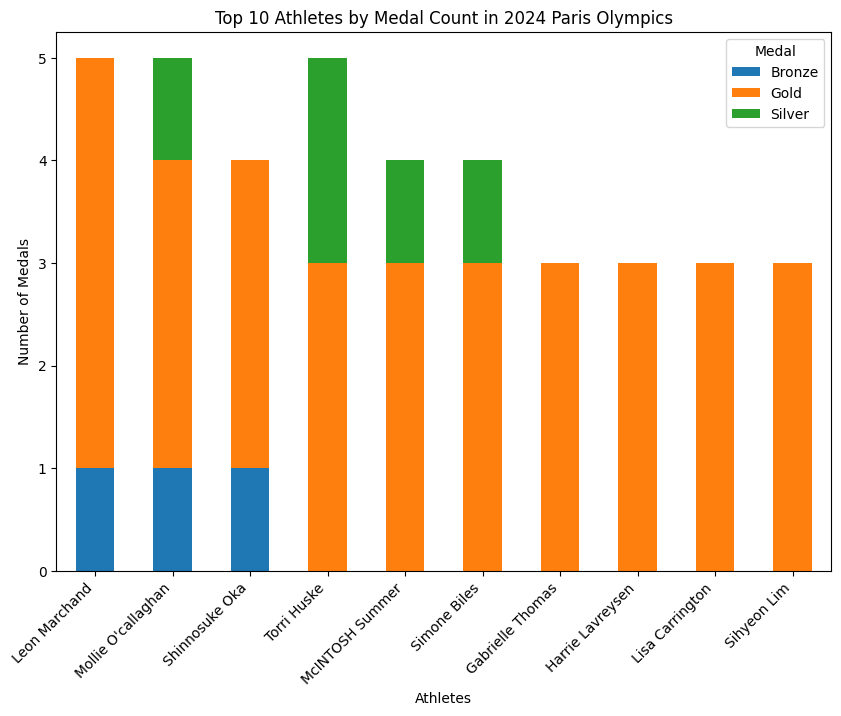

In [ ]:
#Visual of the top 10 athletes
# Select the top 10 athletes
top_10_athletes_2024 = top_athletes.head(10)


# Plotting
top_10_athletes_2024.plot(kind='bar', stacked=True, figsize=(10, 7))


# Title and labels
plt.title('Top 10 Athletes by Medal Count in 2024 Paris Olympics')
plt.xlabel('Athletes')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')  # Rotate athlete names for better readability

In [ ]:
#Top sport based on medal count
# Group by discipline and count the number edals
top_sports_2024 = df_medals_2024.groupby('discipline')['medal_type'].count().reset_index()

# Rename the column for clarity
top_sports_2024 = top_sports_2024.rename(columns={'medal_type': 'Total Medals'})

# Sort the sports by the total medal count in descending order
top_sports_sorted_2024 = top_sports_2024.sort_values(by='Total Medals', ascending=False)

# Display the top sports based on medal count
top_sports_sorted_2024


,discipline,Total Medals
4,Athletics,145
35,Swimming,105
44,Wrestling,72
24,Judo,60
8,Boxing,52
31,Shooting,45
2,Artistic Gymnastics,43
28,Rowing,42
16,Cycling Track,36
19,Fencing,36


In [ ]:
athlete_2024.columns
df_medals_2024

,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
0,Gold Medal,1.0,7/27/2024,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2.0,7/27/2024,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3.0,7/27/2024,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1.0,7/27/2024,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2.0,7/27/2024,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525
...,...,...,...,...,...,...,...,...,...,...,...
1039,Silver Medal,2.0,8/9/2024,KALEYN Boryana,BUL,W,Rhythmic Gymnastics,Individual All-Around,ATH,NaN,1548948
1040,Bronze Medal,3.0,8/9/2024,RAFFAELI Sofia,ITA,W,Rhythmic Gymnastics,Individual All-Around,ATH,NaN,1923694
1041,Gold Medal,1.0,8/9/2024,THIAM Nafissatou,BEL,W,Athletics,Women's Heptathlon,ATH,NaN,1903112
1042,Silver Medal,2.0,8/9/2024,JOHNSON-THOMPSON Katarina,GBR,W,Athletics,Women's Heptathlon,ATH,NaN,1977926


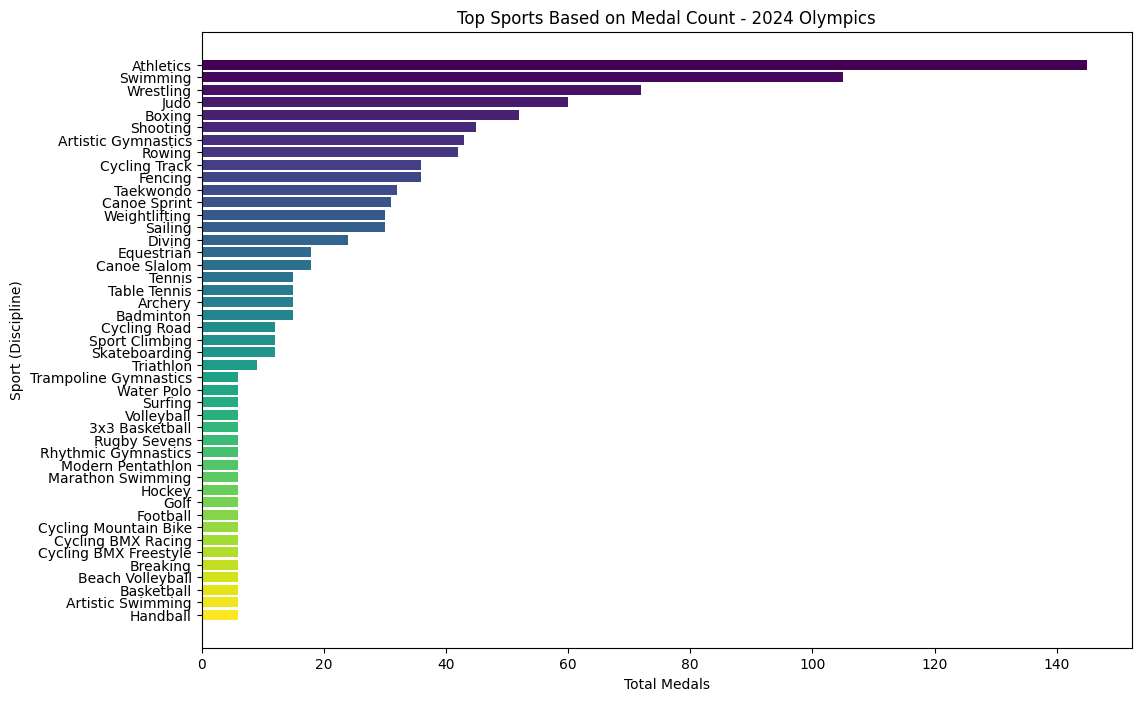

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(top_sports_sorted_2024)))

# Plotting the bar chart for top sports based on medal count
plt.figure(figsize=(12, 8))
plt.barh(top_sports_sorted_2024['discipline'], top_sports_sorted_2024['Total Medals'], color=colors)  # Use the color map
plt.xlabel('Total Medals')
plt.ylabel('Sport (Discipline)')
plt.title('Top Sports Based on Medal Count - 2024 Olympics')
plt.gca().invert_yaxis()  # To display the sport with the most medals at the top
plt.show()


In [ ]:
#What Country Dominated What Sport?
# Group by discipline and country_code, and count the number of medals
country_sport_medals_2024 = df_medals_2024.groupby(['discipline', 'country_code'])['medal_type'].count().reset_index()

# Rename the column for clarity
country_sport_medals_2024 = country_sport_medals_2024.rename(columns={'medal_type': 'Total Medals'})

# Sort by discipline and total medals within each sport
country_sport_medals_sorted_2024 = country_sport_medals_2024.sort_values(['discipline', 'Total Medals'], ascending=[True, False])

# Find the country that dominated each sport by taking the first row for each discipline
dominating_countries_2024 = country_sport_medals_sorted_2024.groupby('discipline').first().reset_index()

# Display the countries that dominated each sport
dominating_countries_2024


,discipline,country_code,Total Medals
0,3x3 Basketball,ESP,1
1,Archery,KOR,7
2,Artistic Gymnastics,CHN,9
3,Artistic Swimming,CHN,2
4,Athletics,USA,34
5,Badminton,CHN,5
6,Basketball,FRA,2
7,Beach Volleyball,BRA,1
8,Boxing,CHN,5
9,Breaking,CAN,1


In [ ]:
# Step 1: Identify all unique NOCs
unique_nocs = dominating_countries_2024['country_code'].unique()

# Step 1.1: Count the number of unique NOCs
num_unique_nocs = len(unique_nocs)

# Display the count of unique NOCs
print(f"Total number of unique NOCs: {num_unique_nocs}")

Total number of unique NOCs: 20


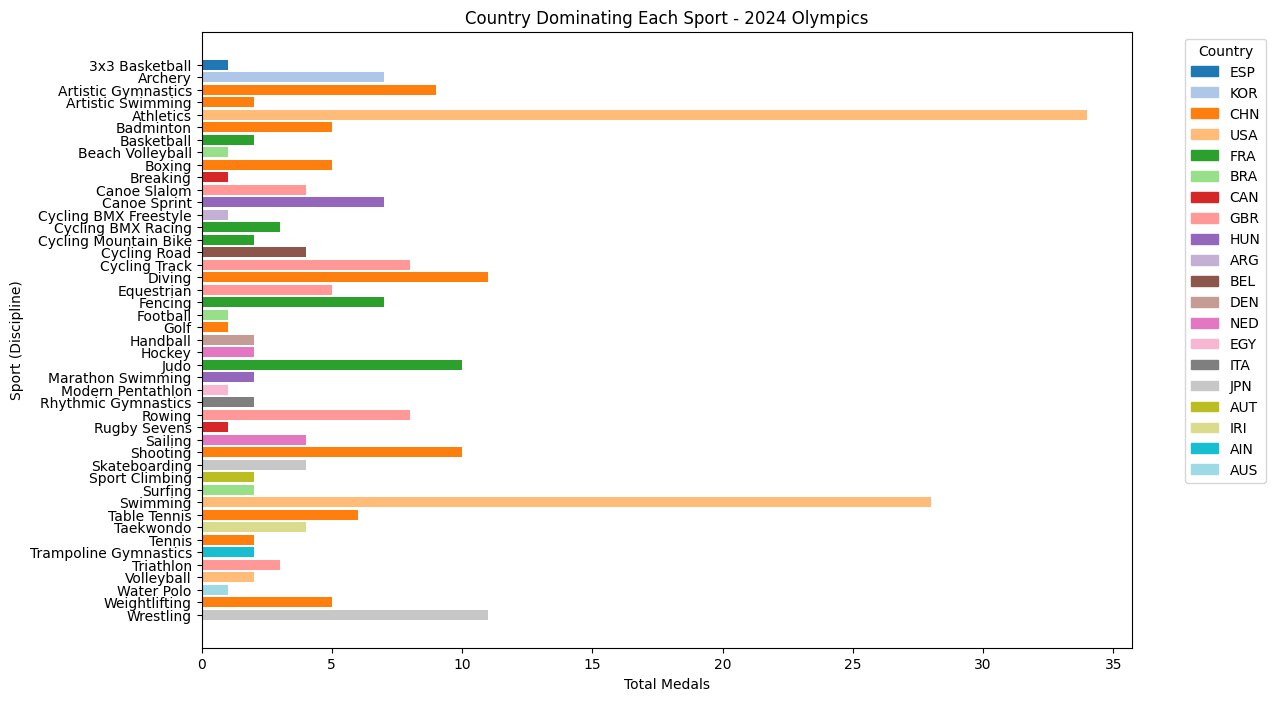

In [ ]:


# Step 2: Generate a color palette with as many colors as there are unique NOCs
color_palette = sns.color_palette('tab20', len(unique_nocs))  # Use the 'tab20' palette for better differentiation
noc_color_map = dict(zip(unique_nocs, color_palette))  # Map each NOC to a color

# Step 3: Assign colors to each sport based on the dominating country
colors = [noc_color_map[country] for country in dominating_countries_2024['country_code']]

# Step 4: Plotting the bar chart for countries dominating each sport
plt.figure(figsize=(12, 8))
plt.barh(dominating_countries_2024['discipline'], dominating_countries_2024['Total Medals'], color=colors)
plt.xlabel('Total Medals')
plt.ylabel('Sport (Discipline)')
plt.title('Country Dominating Each Sport - 2024 Olympics')

# Step 5: Adding a legend
handles = [plt.Rectangle((0,0),1,1, color=noc_color_map[noc]) for noc in unique_nocs]
labels = unique_nocs
plt.legend(handles, labels, title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().invert_yaxis()  # To display the sport with the most medals at the top
plt.show()


In [ ]:
# How has country participation in the olympic summer games changed over time? How have major world events affected participation?
# Sort the DataFrame by NOC (country)
df_NOC = df_olympics[['Sex', 'Year','Sport','NOC', 'Name']].copy()

df_NOC_sorted = df_NOC.groupby(['Year']).nunique() #take out duplicate entries for country per year

df_NOC_sorted

,Sex,Sport,NOC,Name
Year,,,,
1896,1,9,12,176
1900,2,20,31,1215
1904,2,18,15,642
1906,2,13,21,838
1908,2,24,22,2008
1912,2,17,29,2386
1920,2,25,29,2660
1924,2,20,45,3244
1928,2,17,46,3238


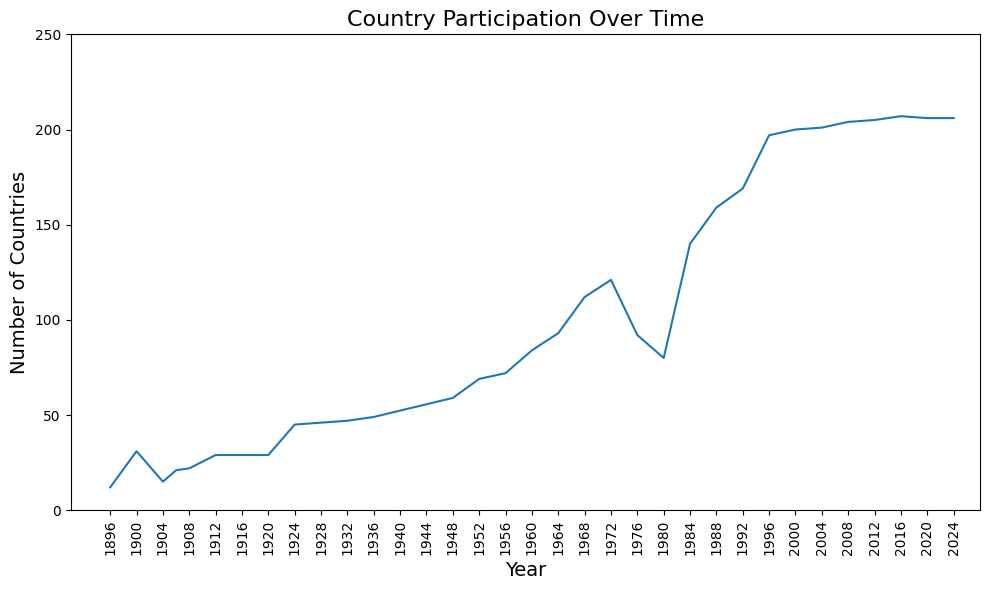

In [ ]:
#line plot for country participation

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn with long format data
sns.lineplot(x='Year', y='NOC', data=df_NOC_sorted)

# Adding titles and labels
plt.title('Country Participation Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

# set the ticks first
plt.xlim([1890,2028])
plt.ylim([0,250])
plt.xticks(np.arange(1896, 2028, step=4))

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Apply tight layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

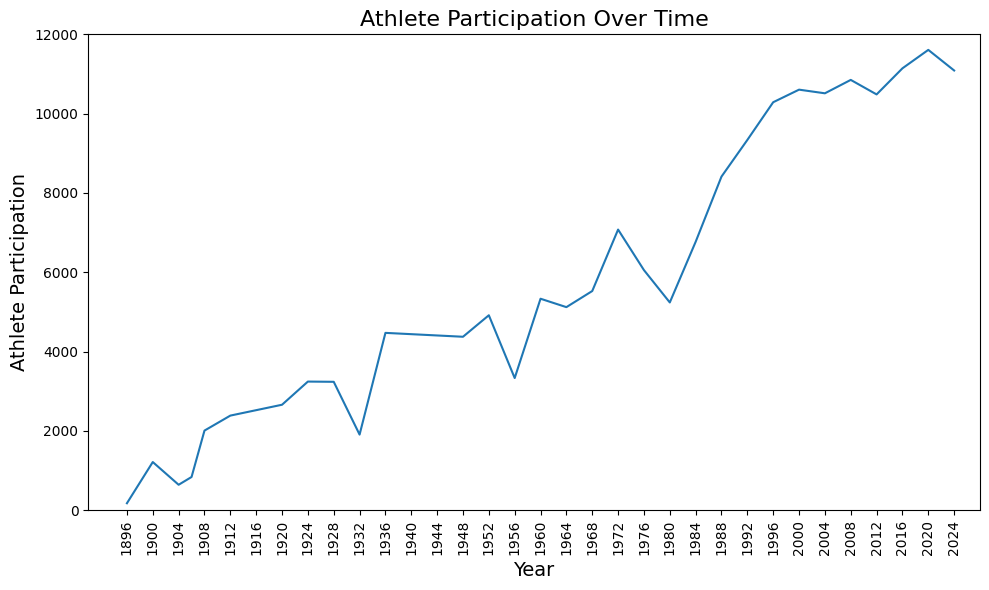

In [ ]:
# How has athlete participation in the olympic summer games changed over time?

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn with long format data
sns.lineplot(x='Year', y='Name', data=df_NOC_sorted)

# Adding titles and labels
plt.title('Athlete Participation Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Athlete Participation', fontsize=14)

# set the ticks first
plt.xlim([1890,2028])
plt.ylim([0,12000])

plt.xticks(np.arange(1896, 2028, step=4))

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Apply tight layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Compare trends in male and female participation over the last 128 years?

#Create new dataframe with gender information
df_gender_breakdown = df_olympics[['Sex', 'Name', 'Year']].copy()

#drop duplicates of athletes (most athletes particiaption in several events)
df_gender_breakdown_cleaned = df_gender_breakdown.drop_duplicates(subset=['Name'])

df_gender_breakdown_cleaned.head()

#groupby gender and year
Gender_By_Year = df_gender_breakdown_cleaned.groupby(['Year', 'Sex']).count()
display(Gender_By_Year)

Name
Year Sex      
1896 M     170
1900 F      23
     M    1160
1904 F       6
     M     598
...        ...
2016 M    3900
2020 F    4616
     M    4941
2024 F    3397
     M    3548

[61 rows x 1 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '1896'),
  Text(1, 0, '1900'),
  Text(2, 0, '1904'),
  Text(3, 0, '1906'),
  Text(4, 0, '1908'),
  Text(5, 0, '1912'),
  Text(6, 0, '1920'),
  Text(7, 0, '1924'),
  Text(8, 0, '1928'),
  Text(9, 0, '1932'),
  Text(10, 0, '1936'),
  Text(11, 0, '1948'),
  Text(12, 0, '1952'),
  Text(13, 0, '1956'),
  Text(14, 0, '1960'),
  Text(15, 0, '1964'),
  Text(16, 0, '1968'),
  Text(17, 0, '1972'),
  Text(18, 0, '1976'),
  Text(19, 0, '1980'),
  Text(20, 0, '1984'),
  Text(21, 0, '1988'),
  Text(22, 0, '1992'),
  Text(23, 0, '1996'),
  Text(24, 0, '2000'),
  Text(25, 0, '2004'),
  Text(26, 0, '2008'),
  Text(27, 0, '2012'),
  Text(28, 0, '2016'),
  Text(29, 0, '2020'),
  Text(30, 0, '2024')])

<Figure size 2000x600 with 0 Axes>

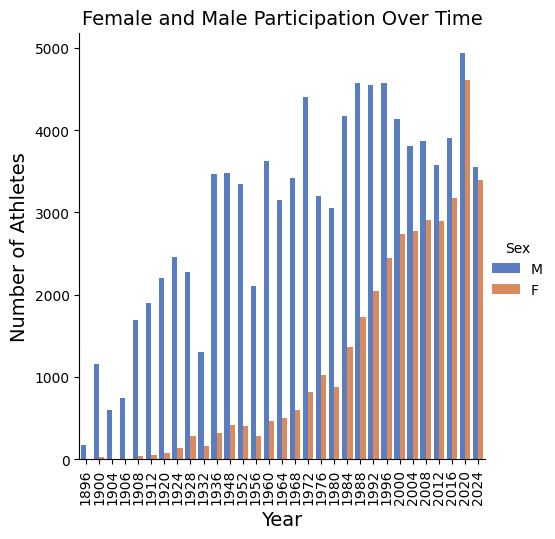

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 6))

#categorical plot
sns.catplot(data=df_gender_breakdown_cleaned, x="Year", hue="Sex", kind="count",
    palette="muted")

# Add titles and labels
plt.title('Female and Male Participation Over Time', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)



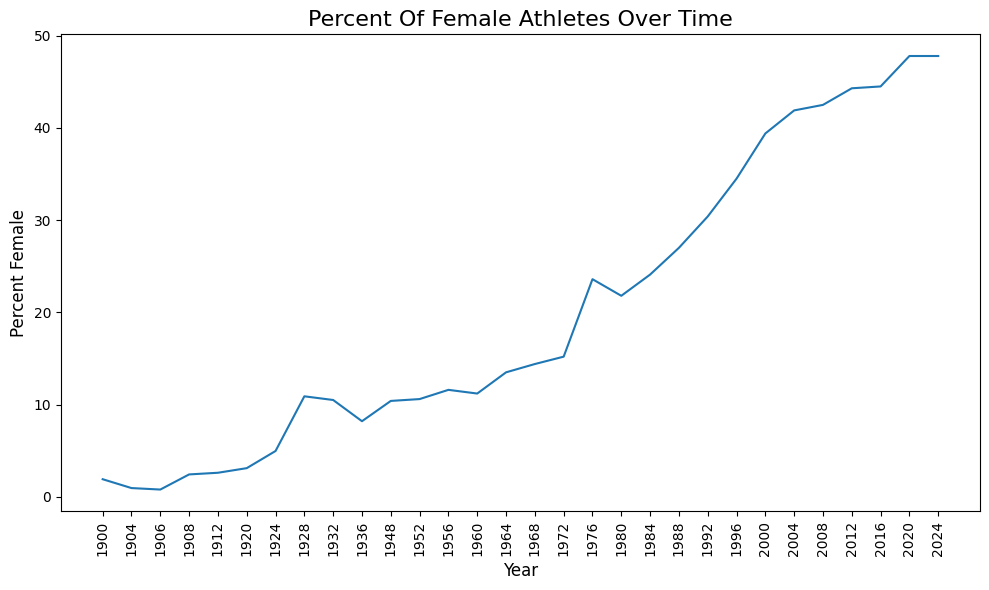

In [ ]:
#Code is for Percent Female participation over time
data_for_graph = {'Year': ['1900', '1904', '1906', '1908','1912','1920','1924','1928','1932','1936','1948','1952','1956','1960','1964','1968','1972','1976','1980','1984','1988','1992','1996','2000','2004','2008','2012','2016','2020', '2024'],
        'Percent Women': [1.91,0.95,0.79,2.43,2.61,3.11,4.97,10.9,10.5,8.2,10.4,10.6,11.6,11.2,13.5,14.4,15.2,23.6,21.8,24.1,27.0,30.4,34.5,39.4,41.9,42.5,44.3,44.5,47.8,47.8]}
Percent_Women = pd.DataFrame(data_for_graph)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the plot
sns.lineplot(x='Year', y='Percent Women', data=Percent_Women)

# Adding titles and labels
plt.title('Percent Of Female Athletes Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percent Female', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
# set the ticks first

# Apply tight layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#How has sport participation and types of sports included changed over time?
df_Sport = df_olympics[['Year','Sport']].copy()

df_Sport_counted = df_Sport.groupby(['Year', 'Sport']).size().reset_index(name='participation')

df_Sport_counted

#df_Sp_filtered = df_Sport_counted[(df_Sport_counted['Year'] == 1900) & (df_Sport_counted['Year'] == 190) & (df_Sport_counted['Year'] == 2024)]

df_Sp_filtered = df_Sport_counted.drop(df_Sport_counted[(df_Sport_counted['Year'] == 1896)].index)

df_Sp_filtered1 = df_Sp_filtered.drop(df_Sp_filtered[(df_Sp_filtered['Year'] > 1900) & (df_Sp_filtered['Year'] < 1932)].index)

df_Sp_filtered2 = df_Sp_filtered1.drop(df_Sp_filtered1[(df_Sp_filtered1['Year'] > 1932) & (df_Sp_filtered1['Year'] < 1964)].index)

df_Sp_filtered3 = df_Sp_filtered2.drop(df_Sp_filtered2[(df_Sp_filtered2['Year'] > 1964) & (df_Sp_filtered2['Year'] < 1996)].index)

df_Sp_filtered4 = df_Sp_filtered3.drop(df_Sp_filtered3[(df_Sp_filtered3['Year'] > 1996) & (df_Sp_filtered3['Year'] < 2024)].index)


df_Sp_filtered4.head(25)


,Year,Sport,participation
9,1900,Archery,32
10,1900,Athletics,234
11,1900,Basque Pelota,2
12,1900,Cricket,24
13,1900,Croquet,19
14,1900,Cycling,92
15,1900,Equestrianism,79
16,1900,Fencing,317
17,1900,Football,35
18,1900,Golf,22


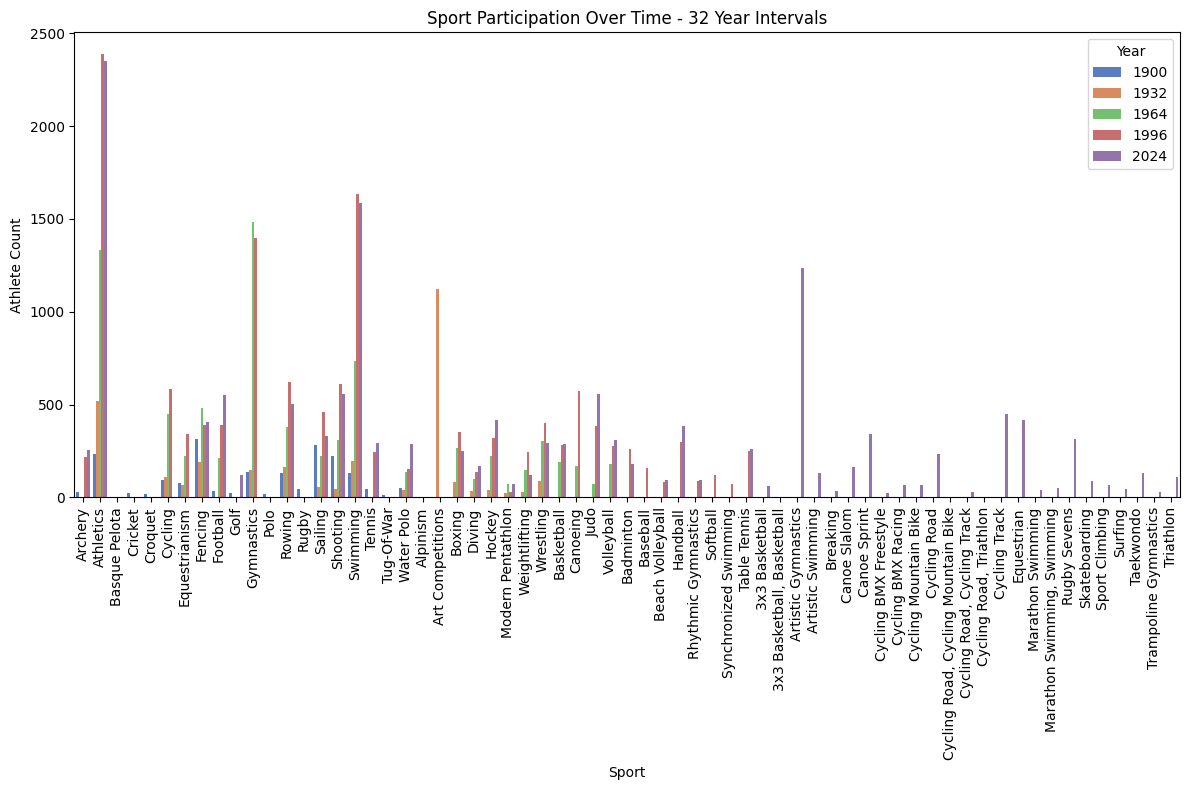

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Sport', y='participation', hue='Year', data=df_Sp_filtered4, palette='muted')

# Add titles and labels
plt.title('Sport Participation Over Time - 32 Year Intervals')
plt.xlabel('Sport')
plt.ylabel('Athlete Count')
# Adjust the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('olympics_dataset.csv')

# Impute missing values
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Impute categorical columns with mode
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


X = df.drop('Medal', axis=1)
y = df['Medal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[ 2007   181  1486   228]
 [  195  2432  1044   252]
 [ 1893  1263 59452  1538]
 [  218   230  1336  2015]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.51      0.49      3902
           1       0.59      0.62      0.61      3923
           2       0.94      0.93      0.93     64146
           3       0.50      0.53      0.51      3799

    accuracy                           0.87     75770
   macro avg       0.62      0.65      0.64     75770
weighted avg       0.87      0.87      0.87     75770



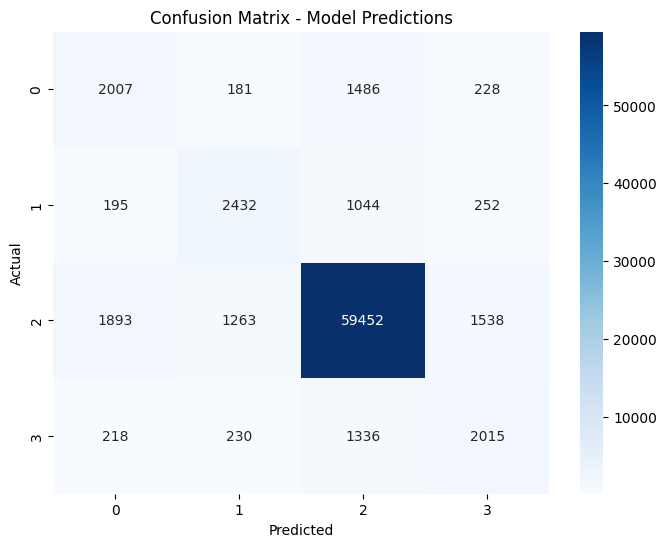

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model Predictions')
plt.show()


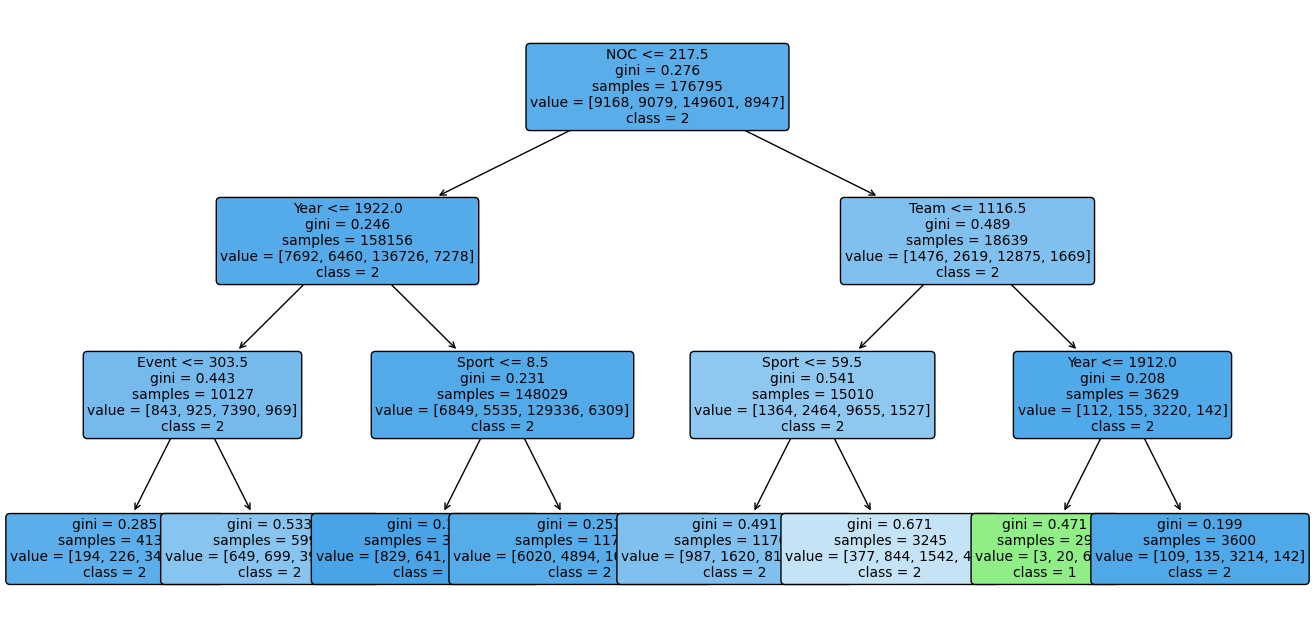

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Retrain the decision tree with further pruning (reduce max_depth to 5)
model_simpler = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=50)
model_simpler.fit(X_train, y_train)

# Plot the simplified decision tree
plt.figure(figsize=(16, 8))
plot_tree(model_simpler, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1', '2', '3'], fontsize=10)

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

In [ ]:
data_tokyo = pd.read_csv("/content/tokyo_2020_tweets.csv.zip")

In [ ]:
data_tokyo.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0,0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0,0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646,3,5,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0,1,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975,2724,36554,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1,0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0,0,False


In [ ]:
data_tokyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15501 entries, 0 to 15500
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                15501 non-null  int64 
 1   user_name         15501 non-null  object
 2   user_location     11977 non-null  object
 3   user_description  14506 non-null  object
 4   user_created      15501 non-null  object
 5   user_followers    15501 non-null  int64 
 6   user_friends      15501 non-null  int64 
 7   user_favourites   15501 non-null  int64 
 8   user_verified     15501 non-null  bool  
 9   date              15501 non-null  object
 10  text              15501 non-null  object
 11  hashtags          11742 non-null  object
 12  source            15501 non-null  object
 13  retweets          15501 non-null  int64 
 14  favorites         15501 non-null  int64 
 15  is_retweet        15501 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.7+ MB


In [ ]:
data_tokyo.isnull().sum()


,0
id,0
user_name,0
user_location,3524
user_description,995
user_created,0
user_followers,0
user_friends,0
user_favourites,0
user_verified,0
date,0


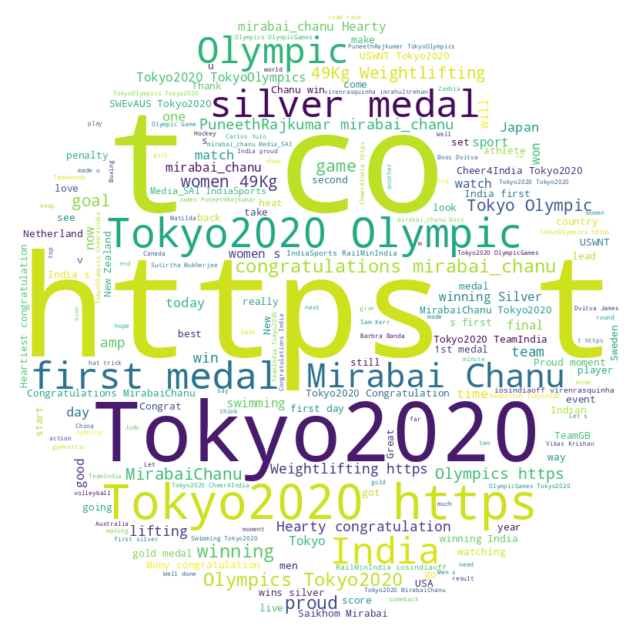

In [ ]:
# Create a circular mask using NumPy
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 400 ** 2  # Create a circular mask
mask = 255 * mask.astype(int)  # Convert to a format suitable for WordCloud

# Combine all the text from the 'text' column into a single string
text_data = " ".join(review for review in data_tokyo['text'])

# Generate the word cloud with the circular mask
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask, contour_color='black').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
# First, calculate the polarity score
data_tokyo['sentiment_polarity'] = data_tokyo['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Now categorize the sentiment as Positive, Negative, or Neutral
data_tokyo['sentiment_category'] = data_tokyo['sentiment_polarity'].apply(categorize_sentiment)

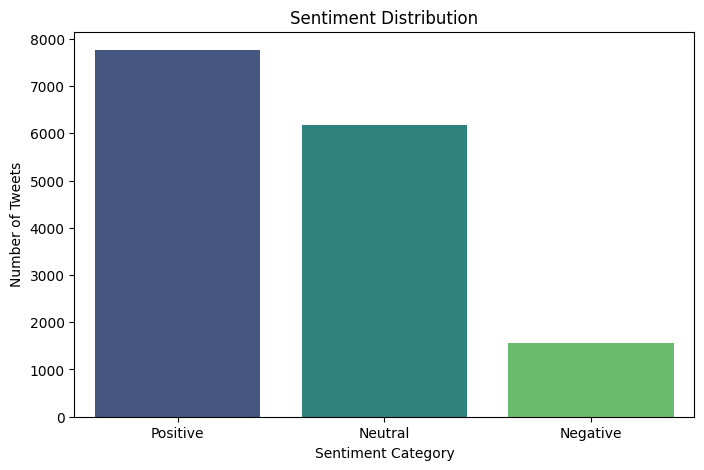

In [ ]:
# Count the number of each sentiment category
sentiment_counts = data_tokyo['sentiment_category'].value_counts()

# Plot the counts as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')
plt.show()